<ipython-input-18-c8028fc0fd74>:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig  = plt.figure(figsize = (24,8))


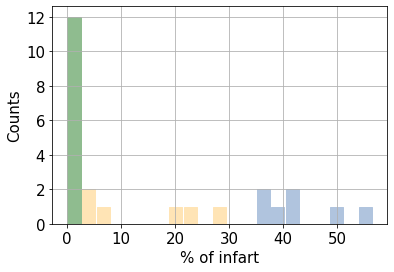

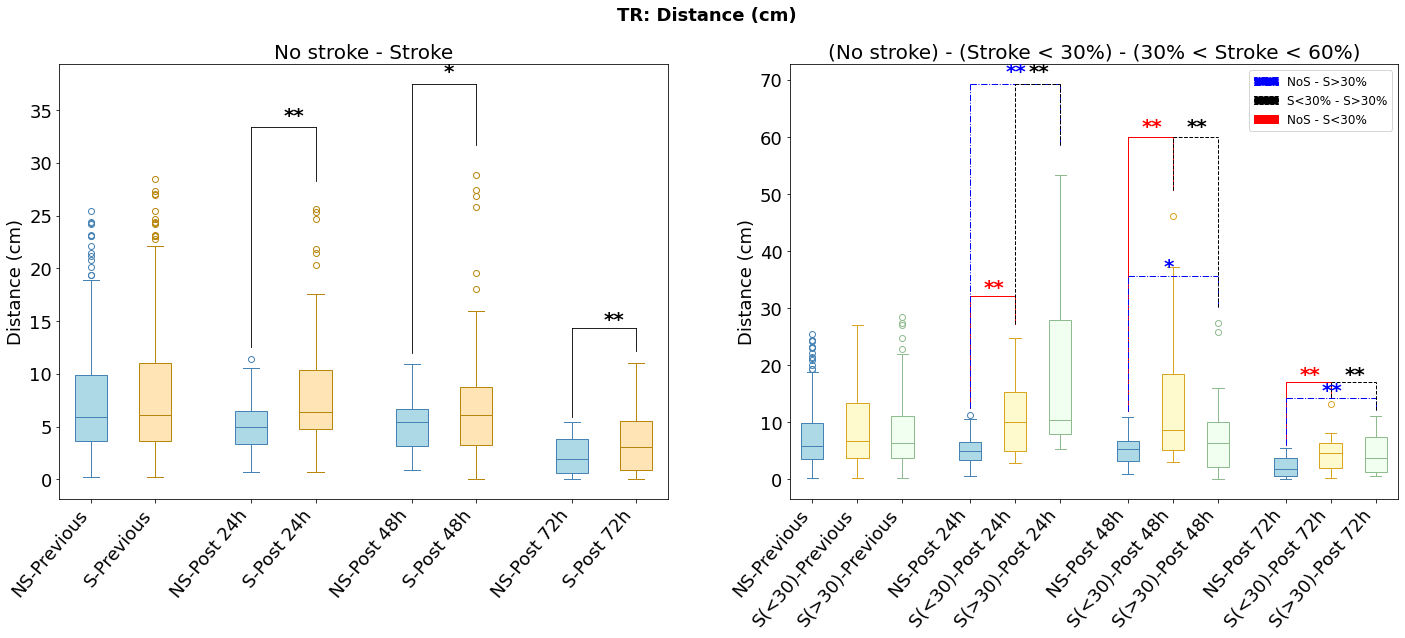

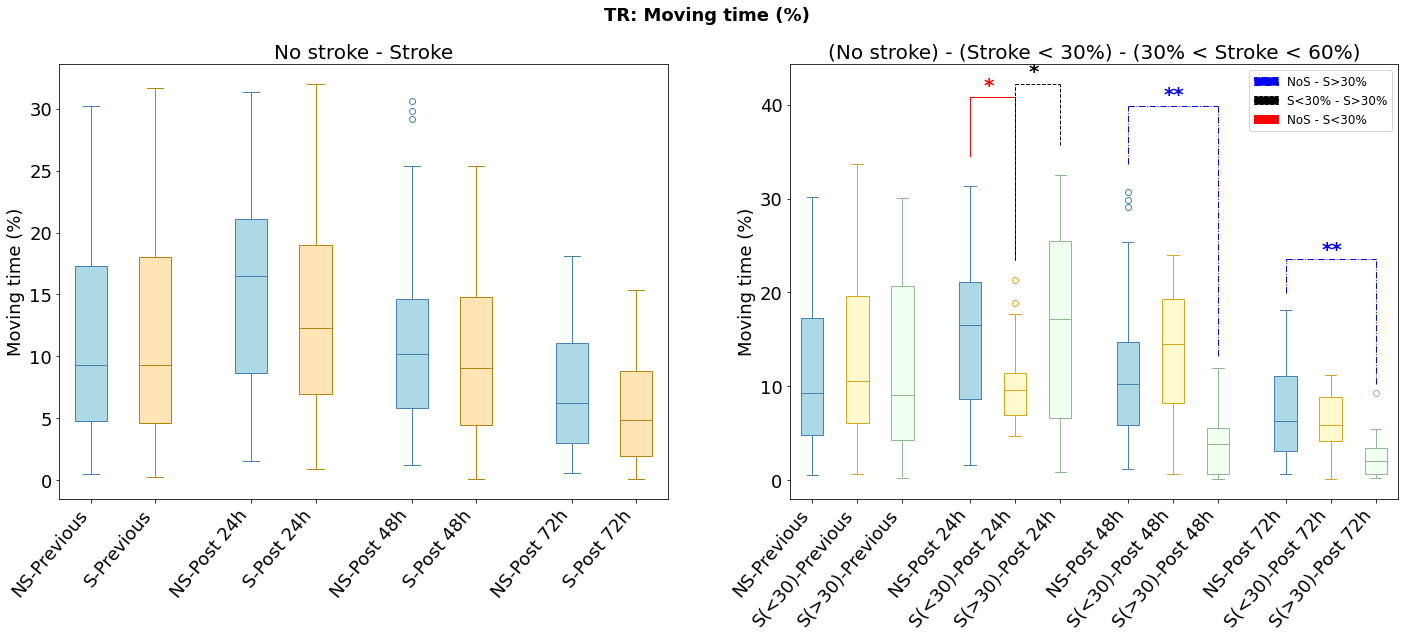

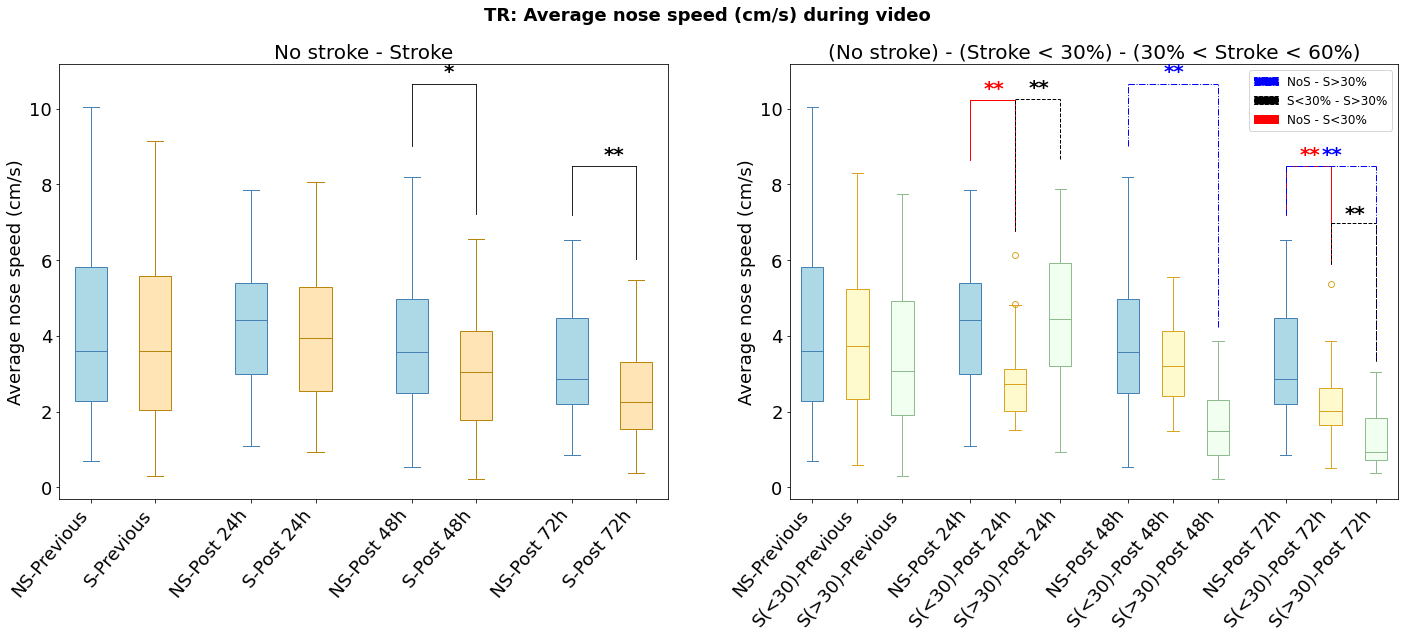

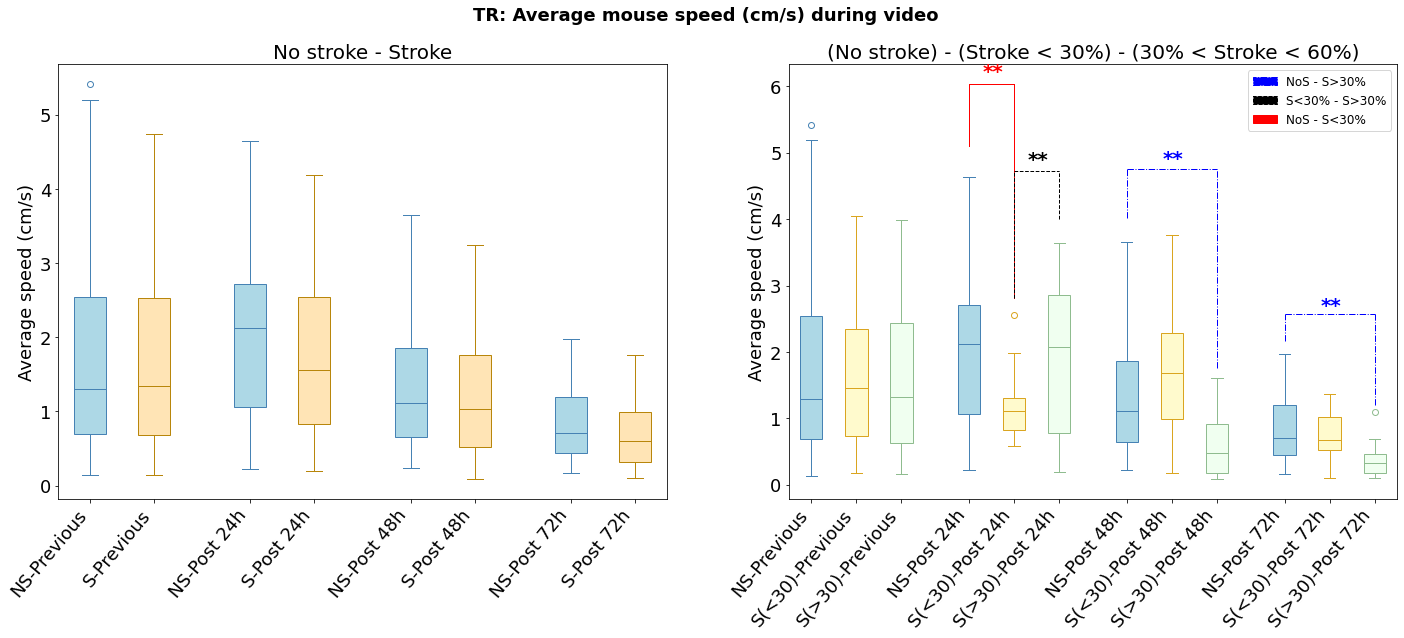

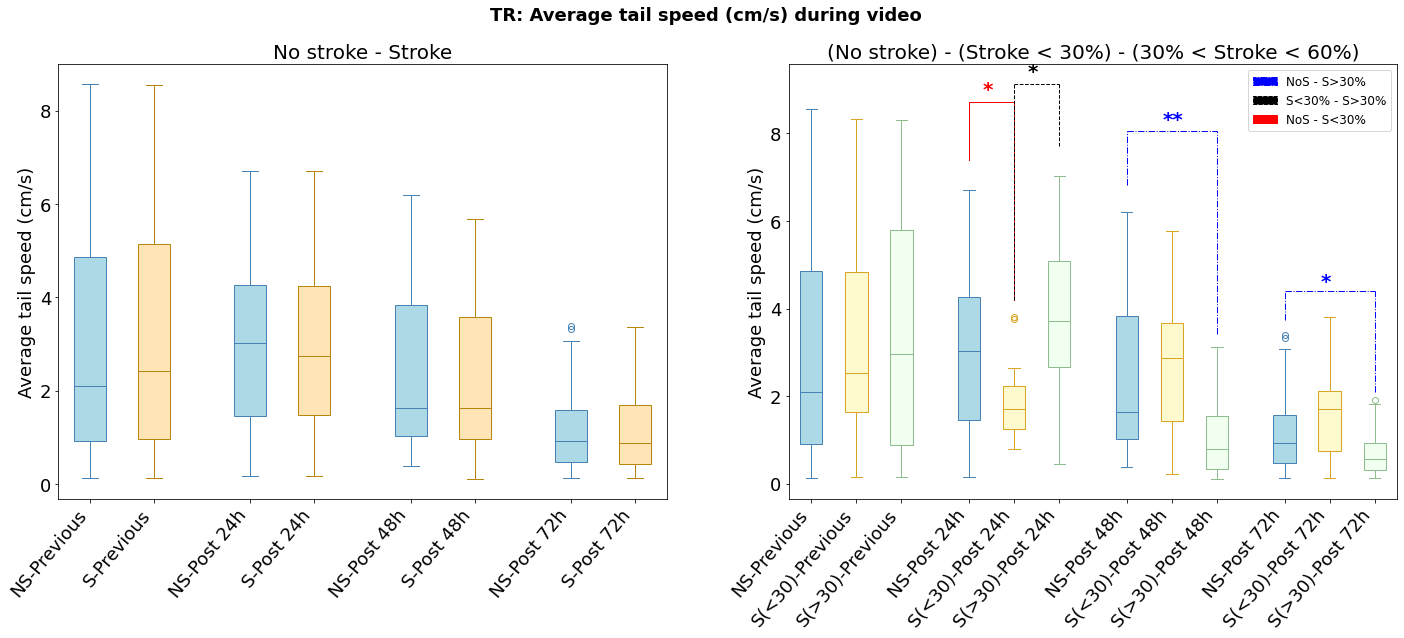

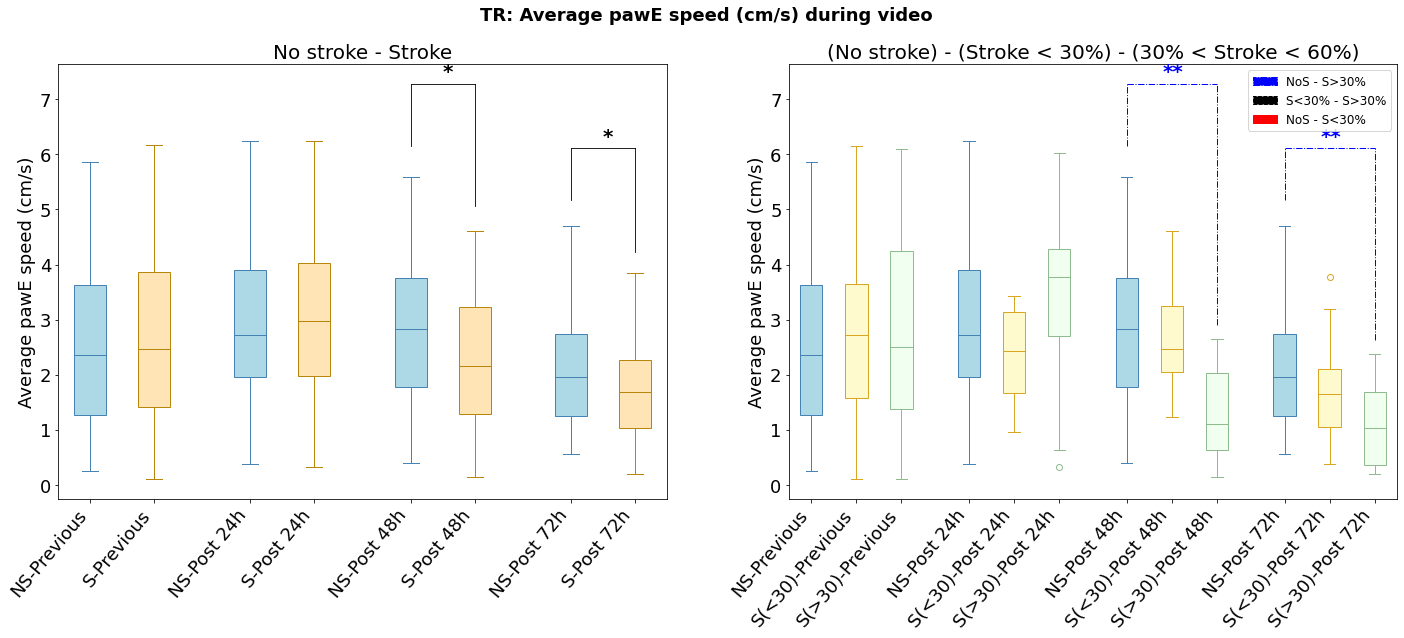

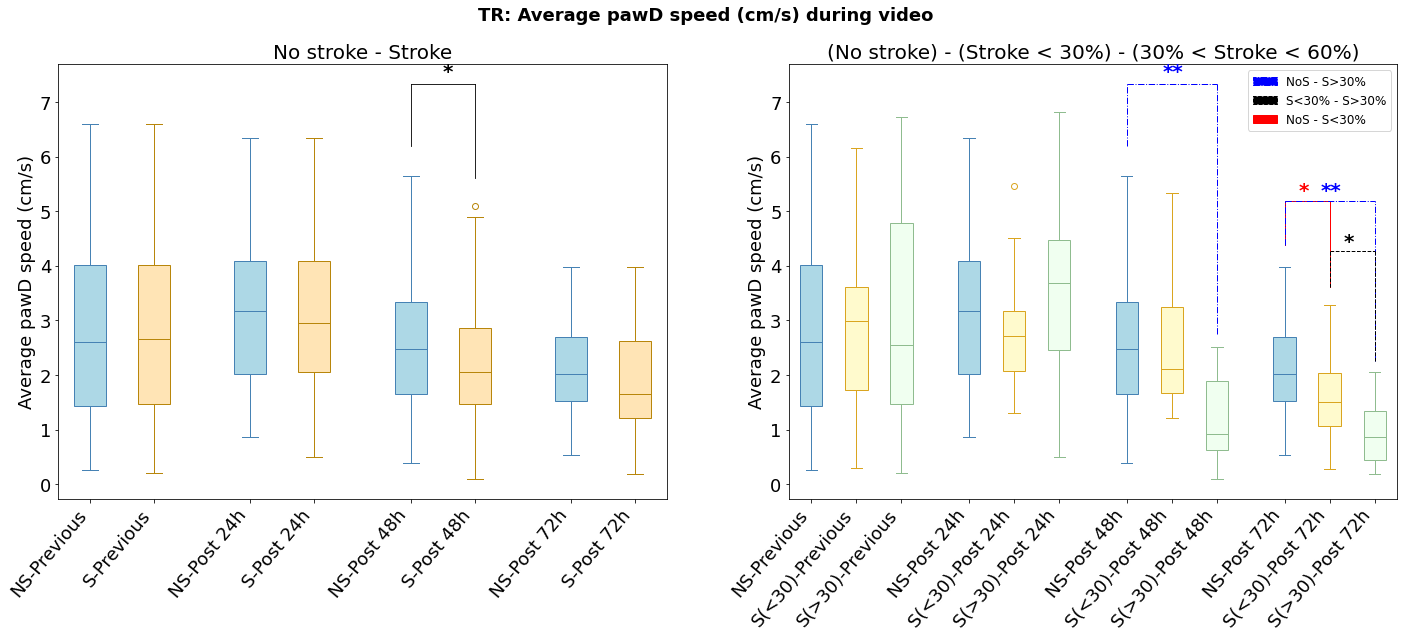

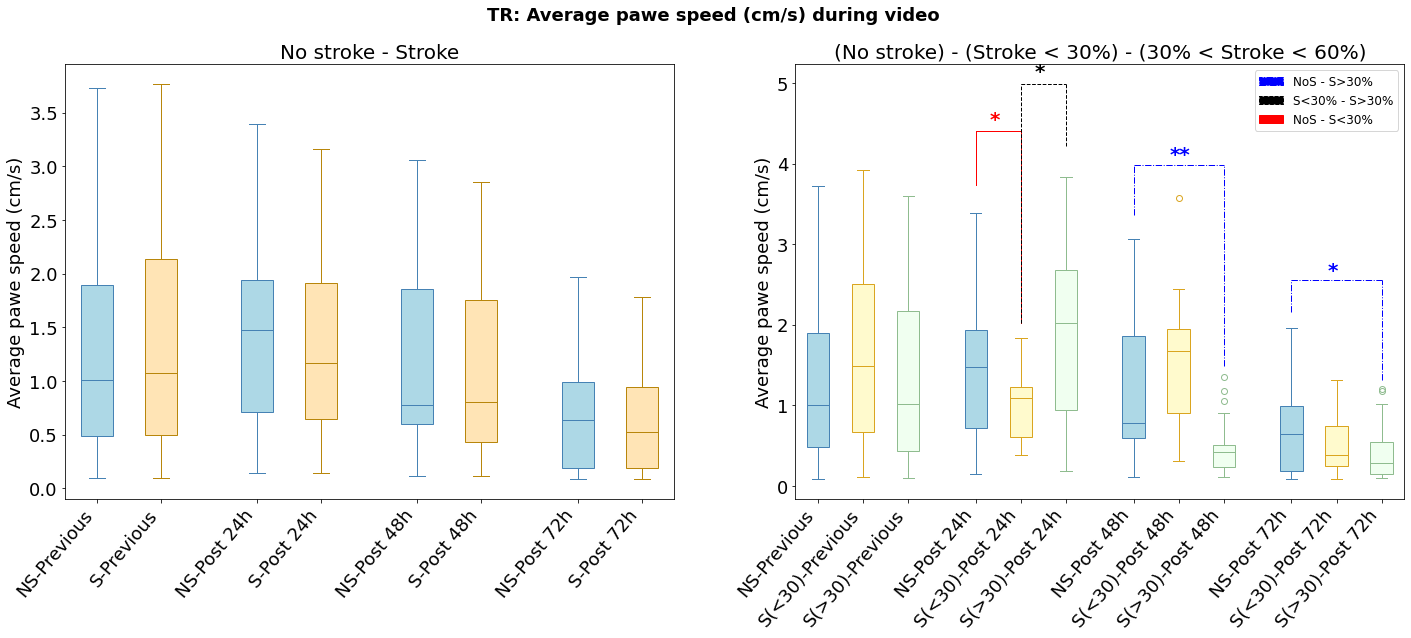

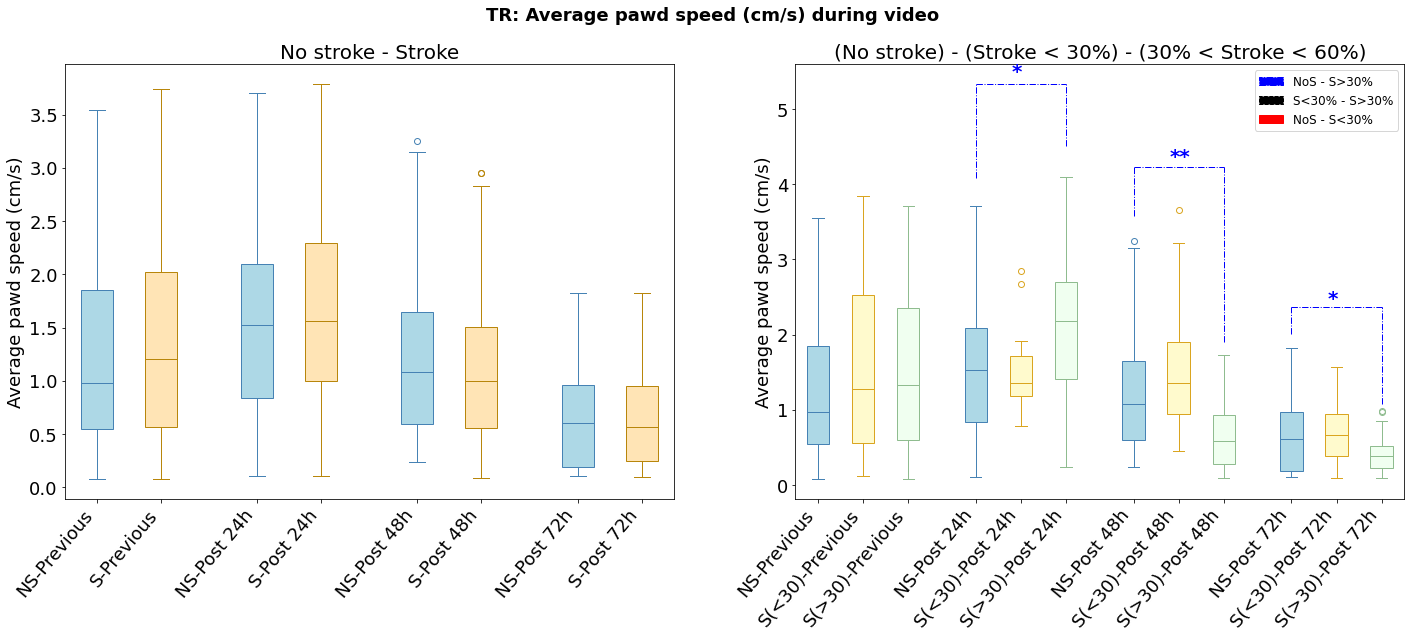

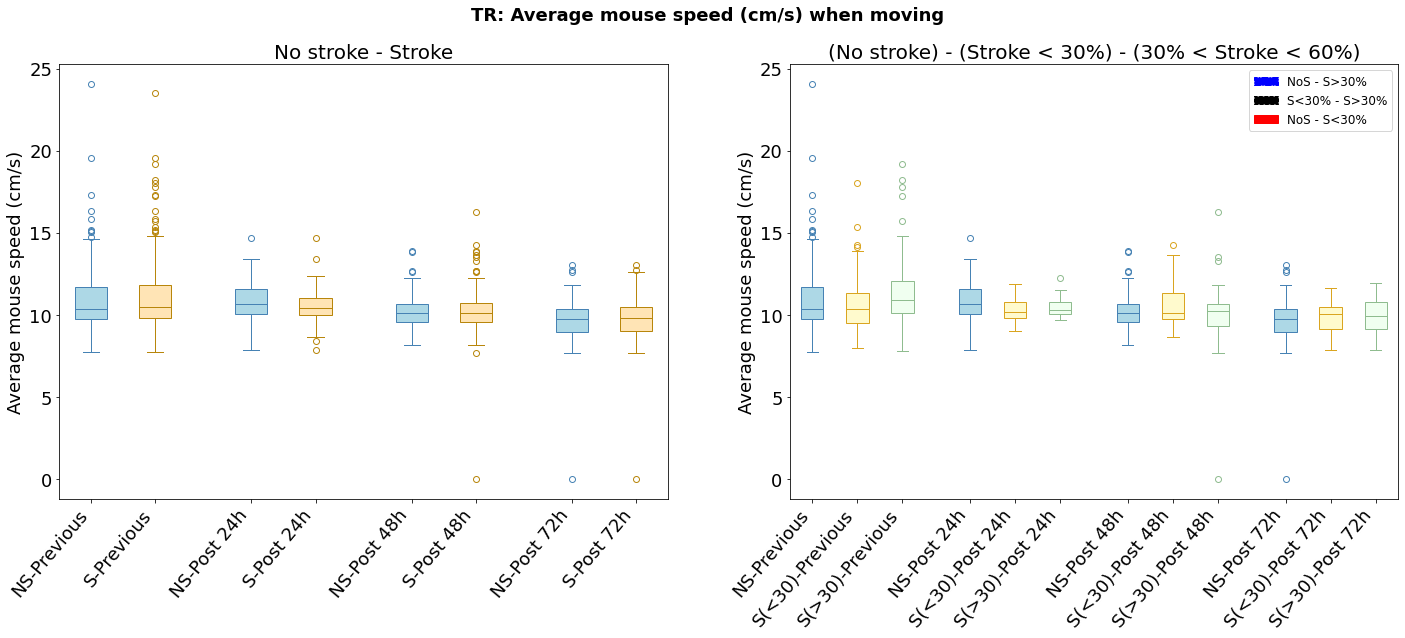

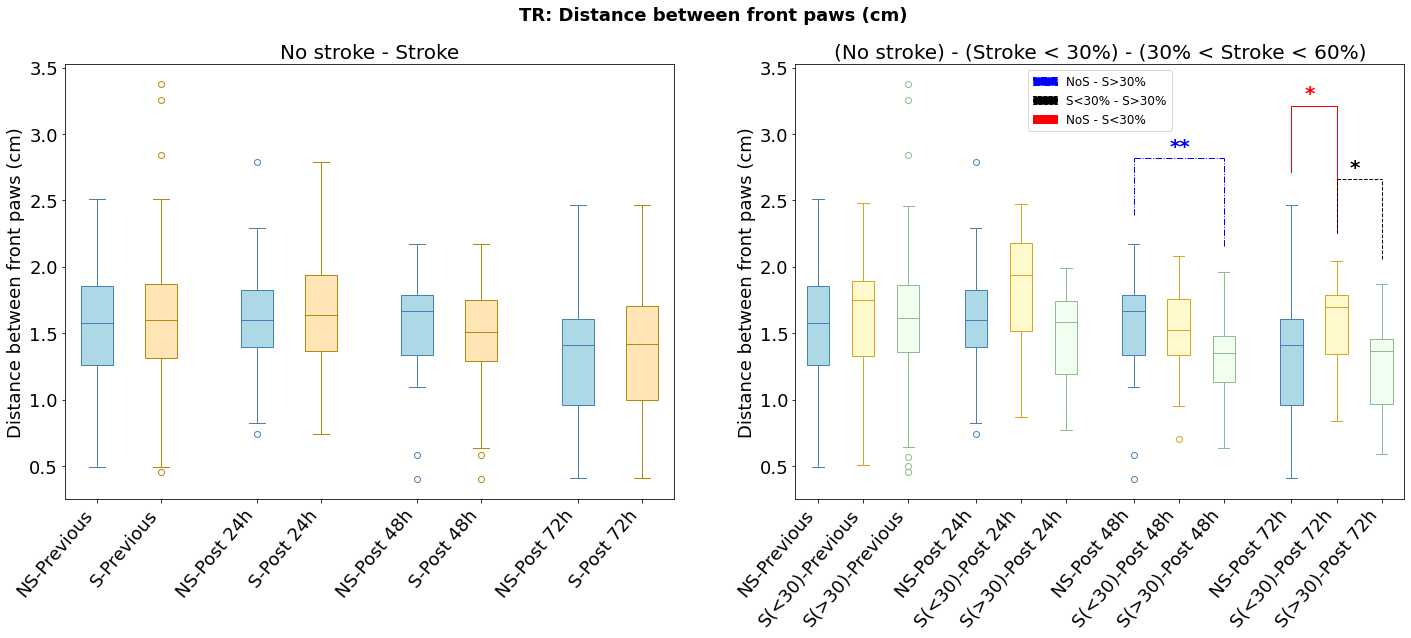

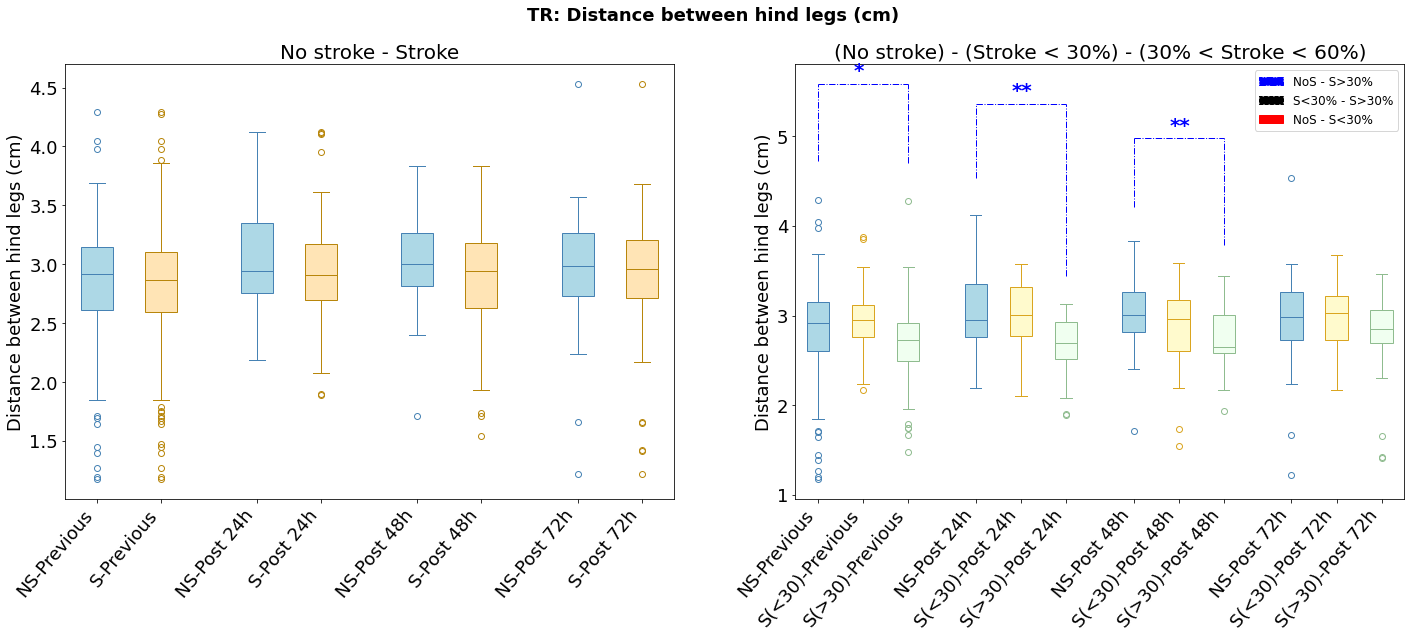

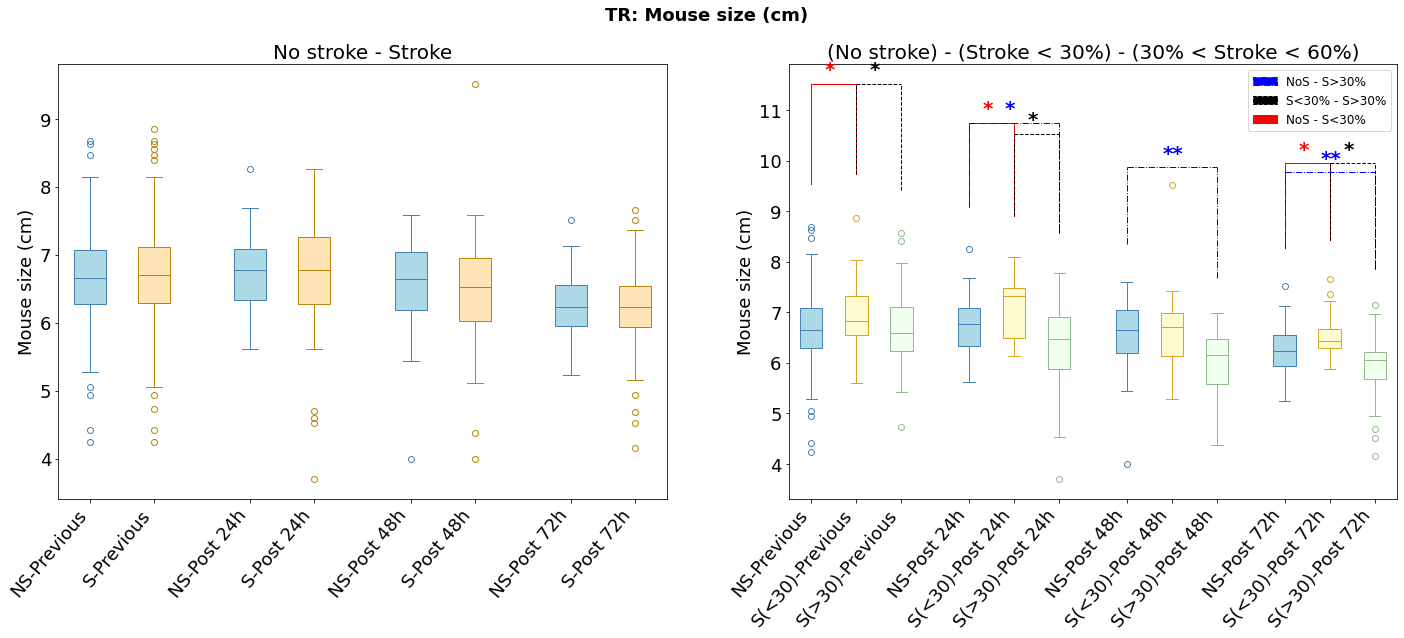

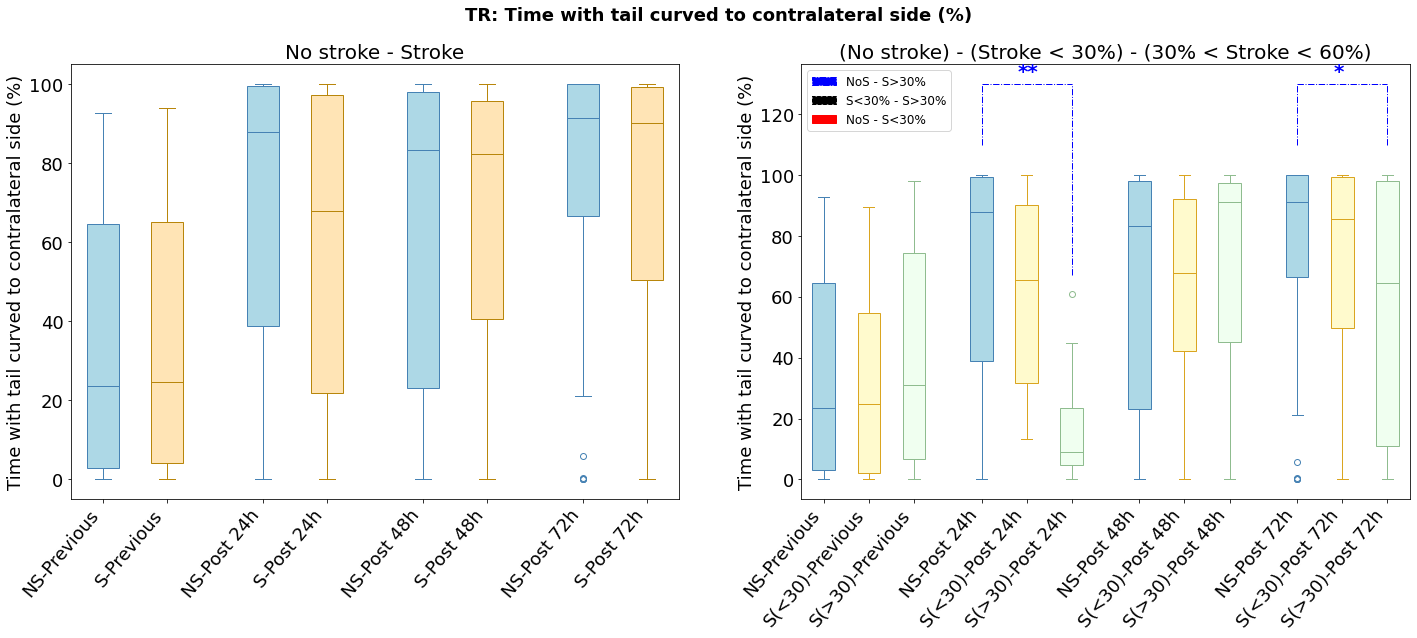

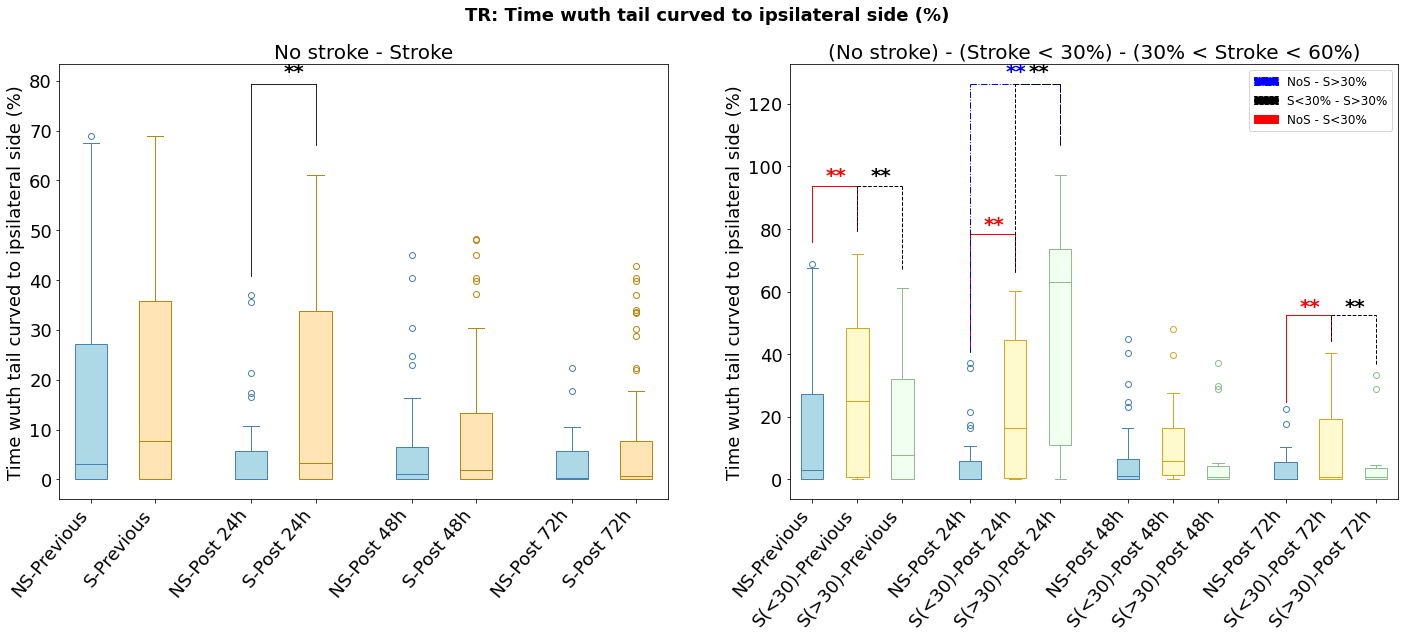

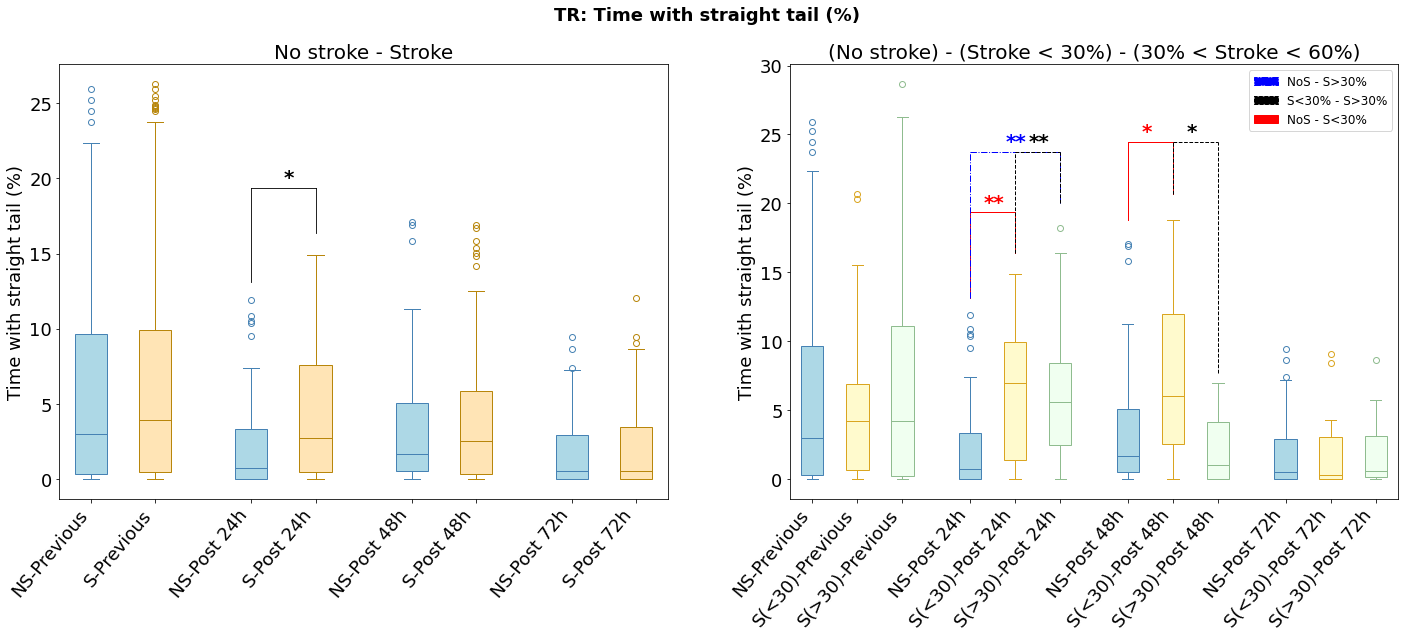

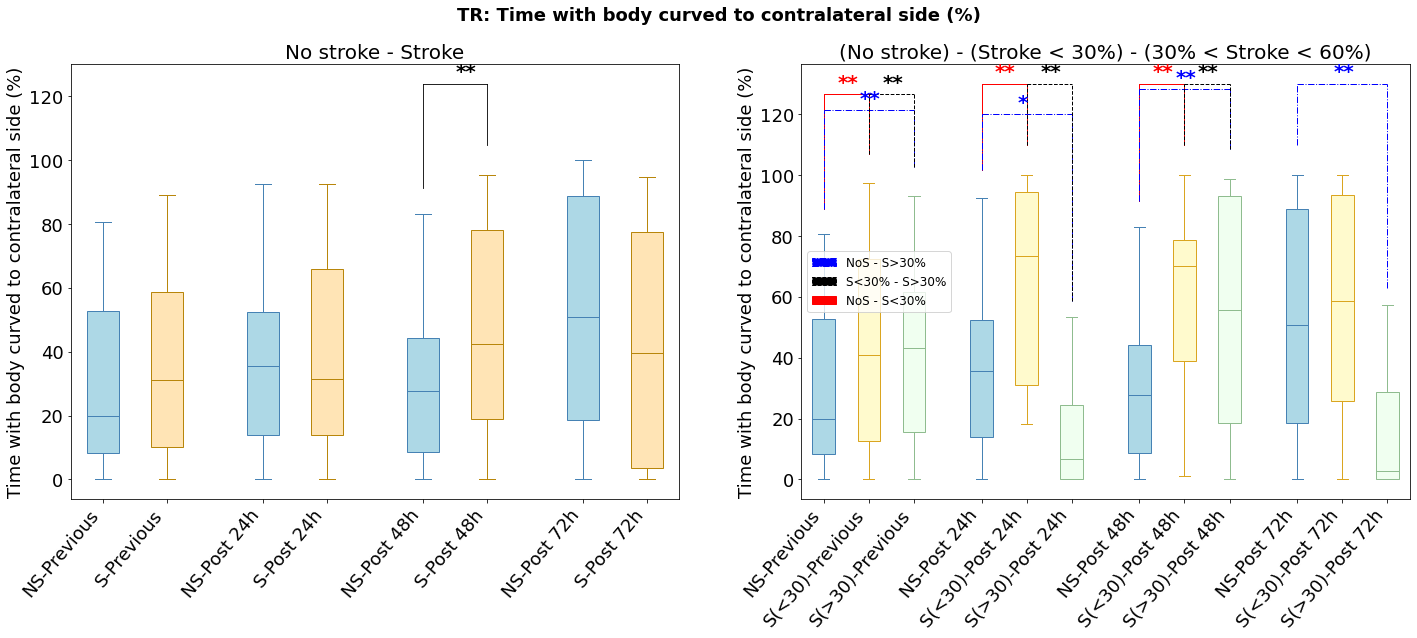

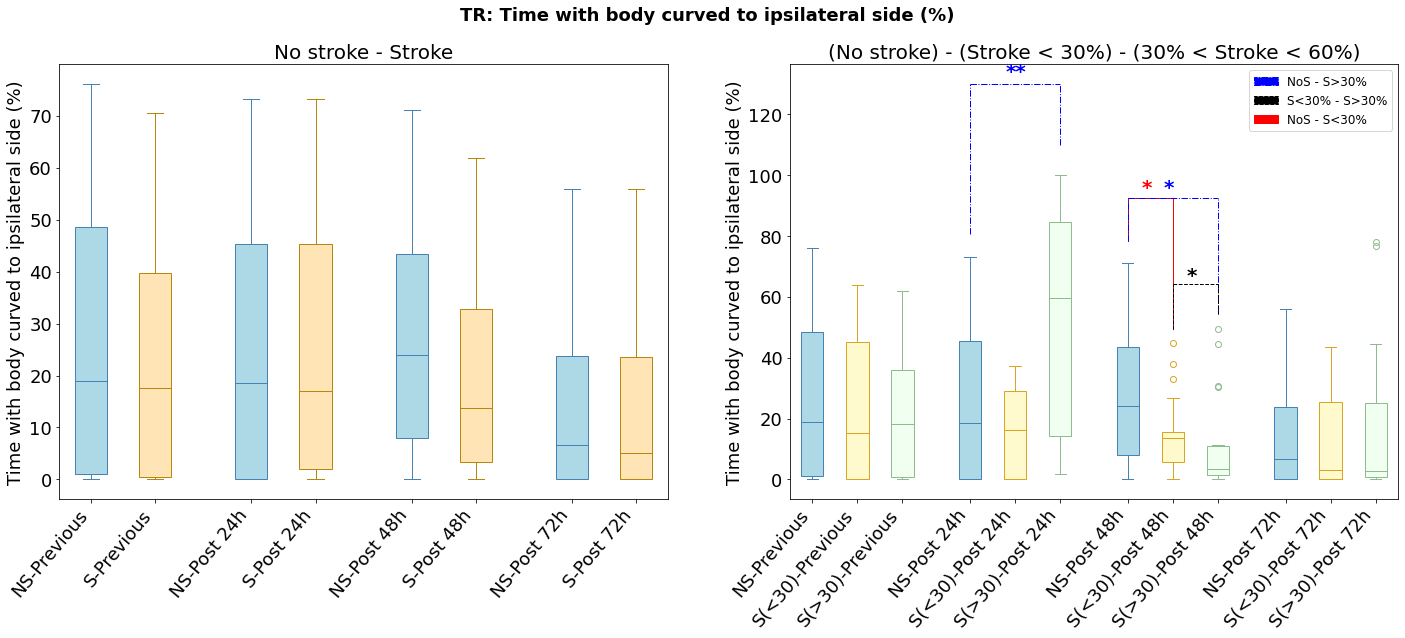

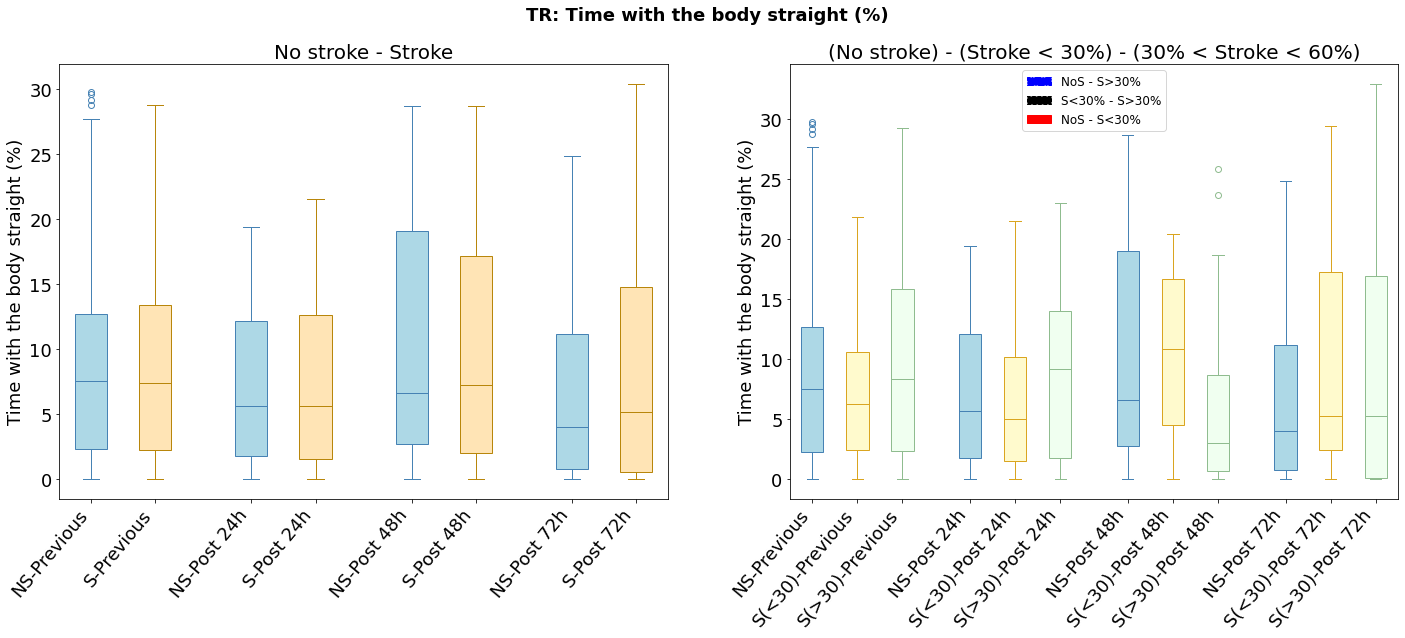

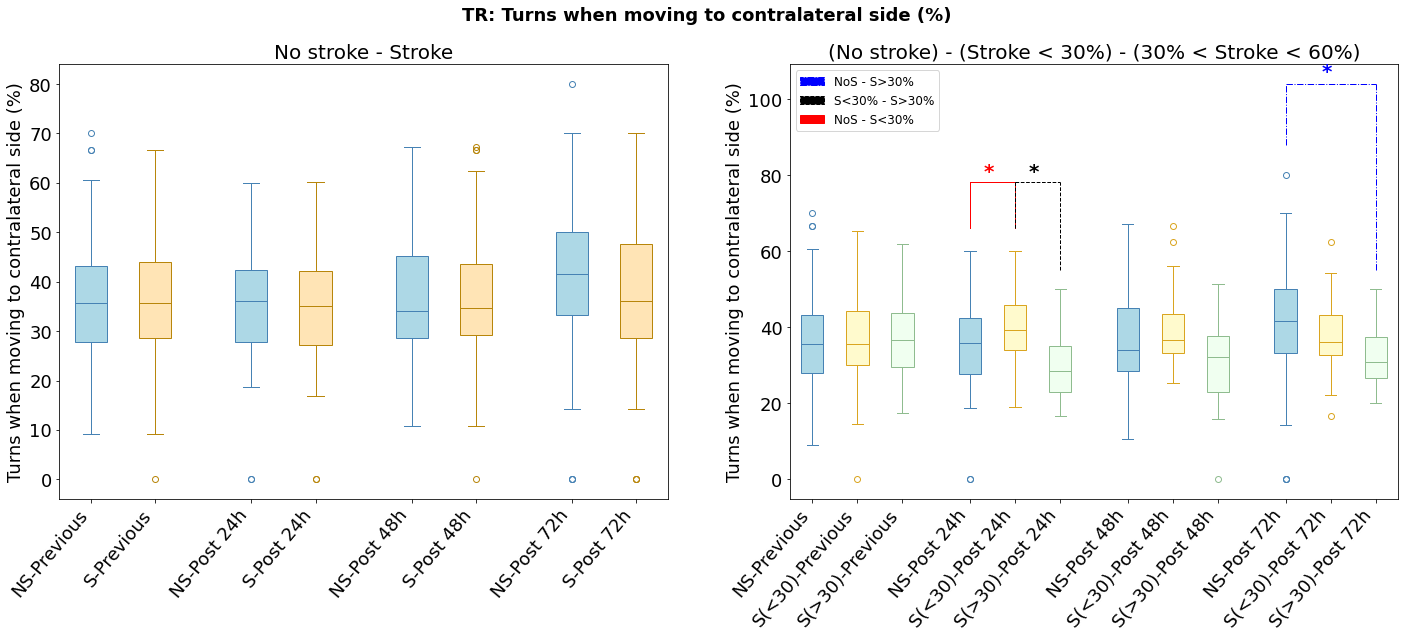

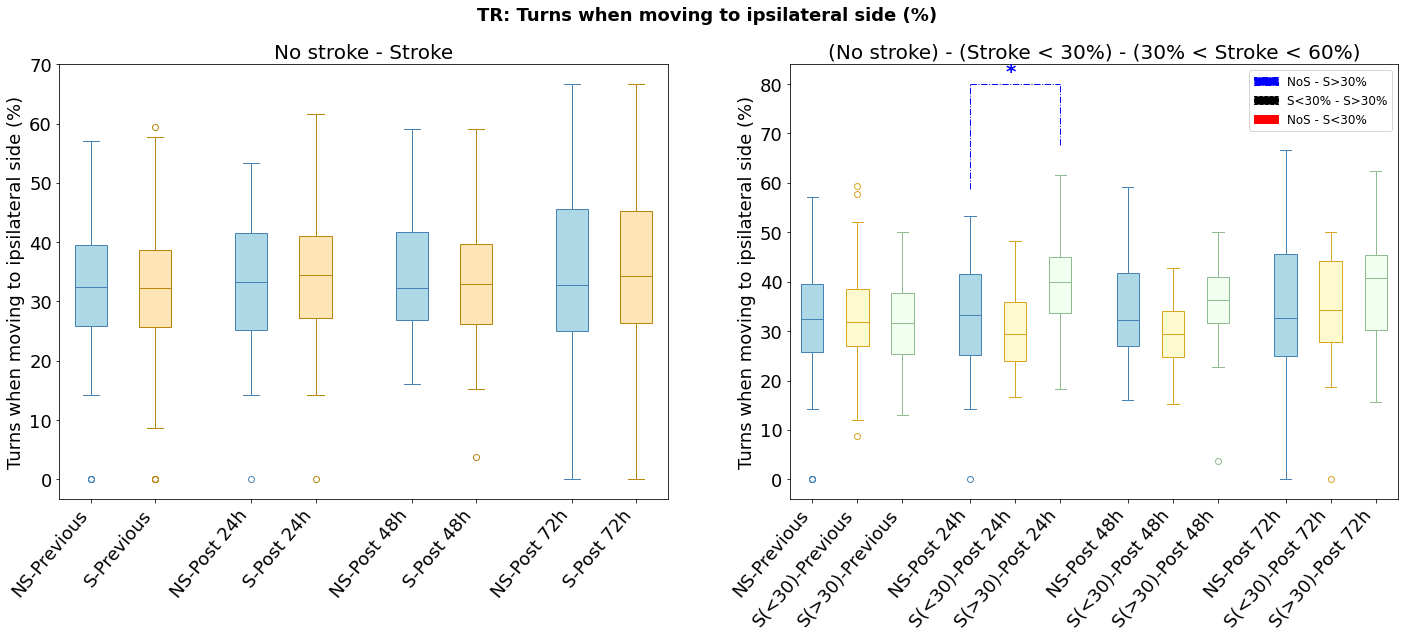

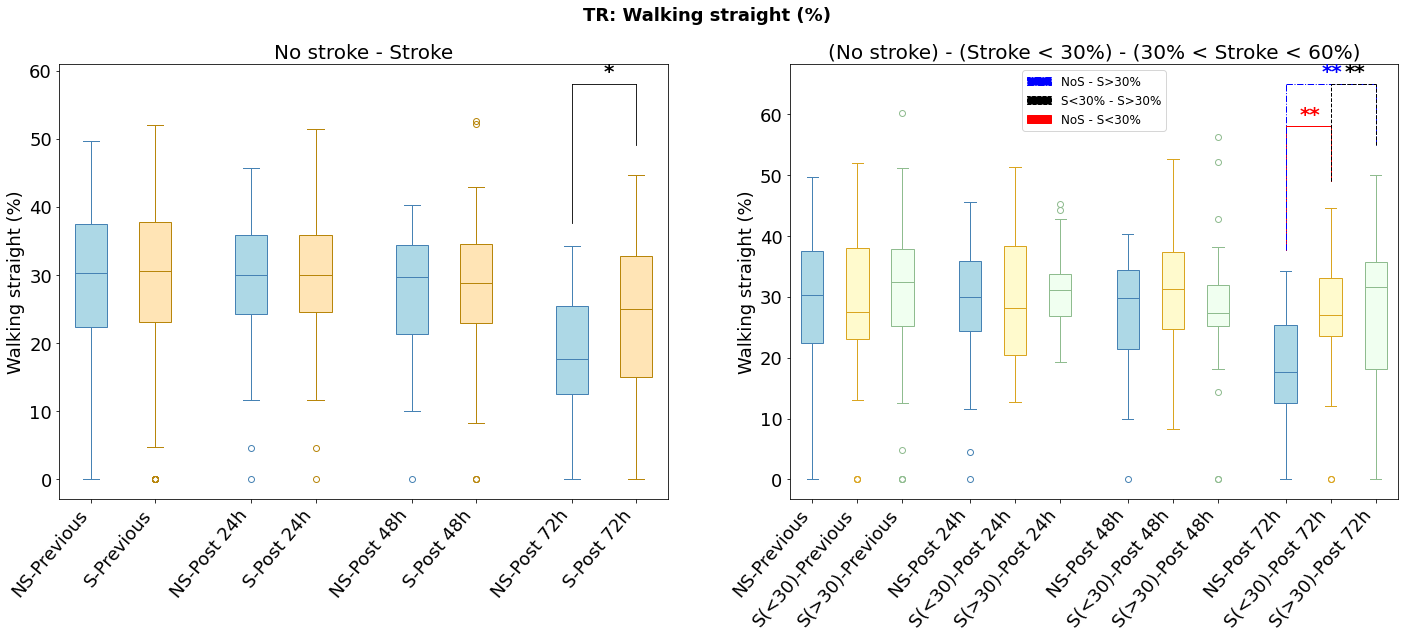

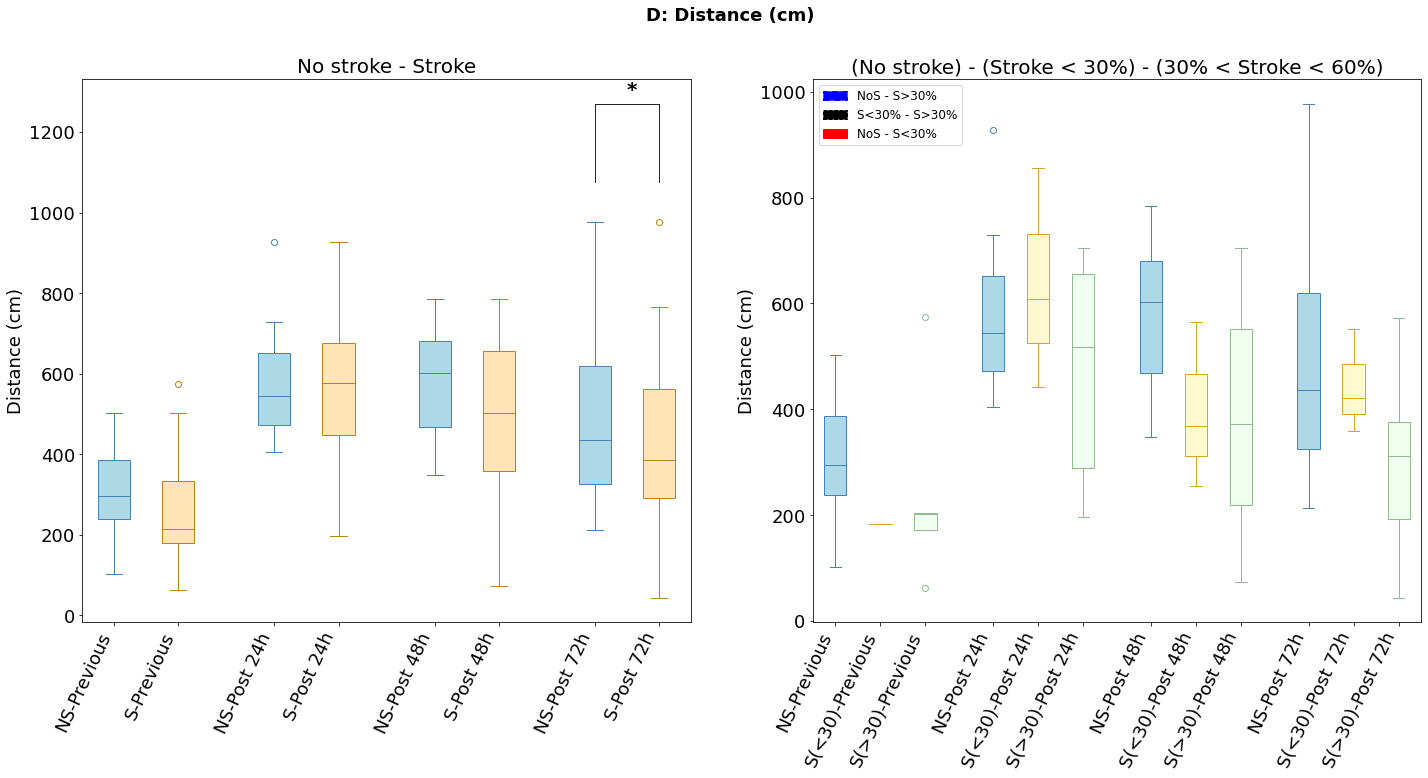

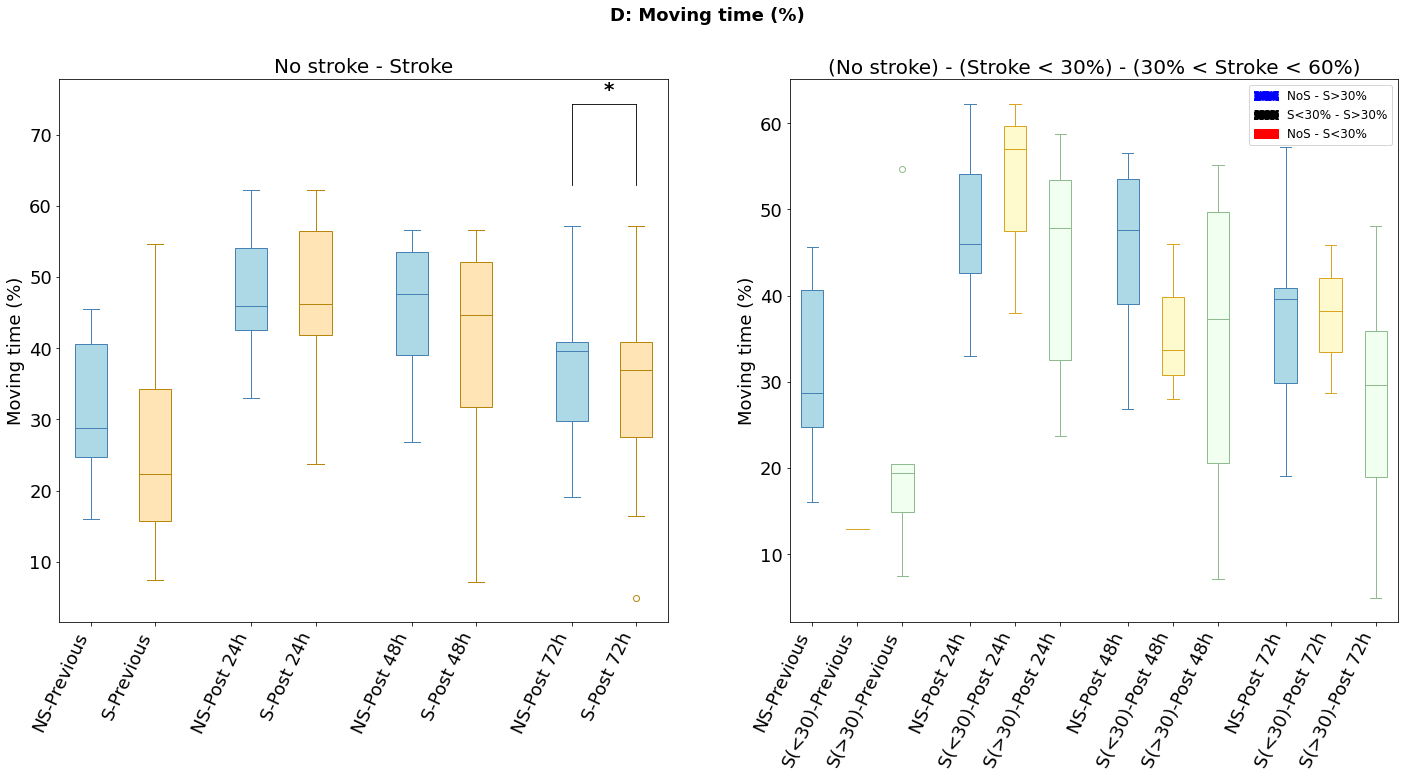

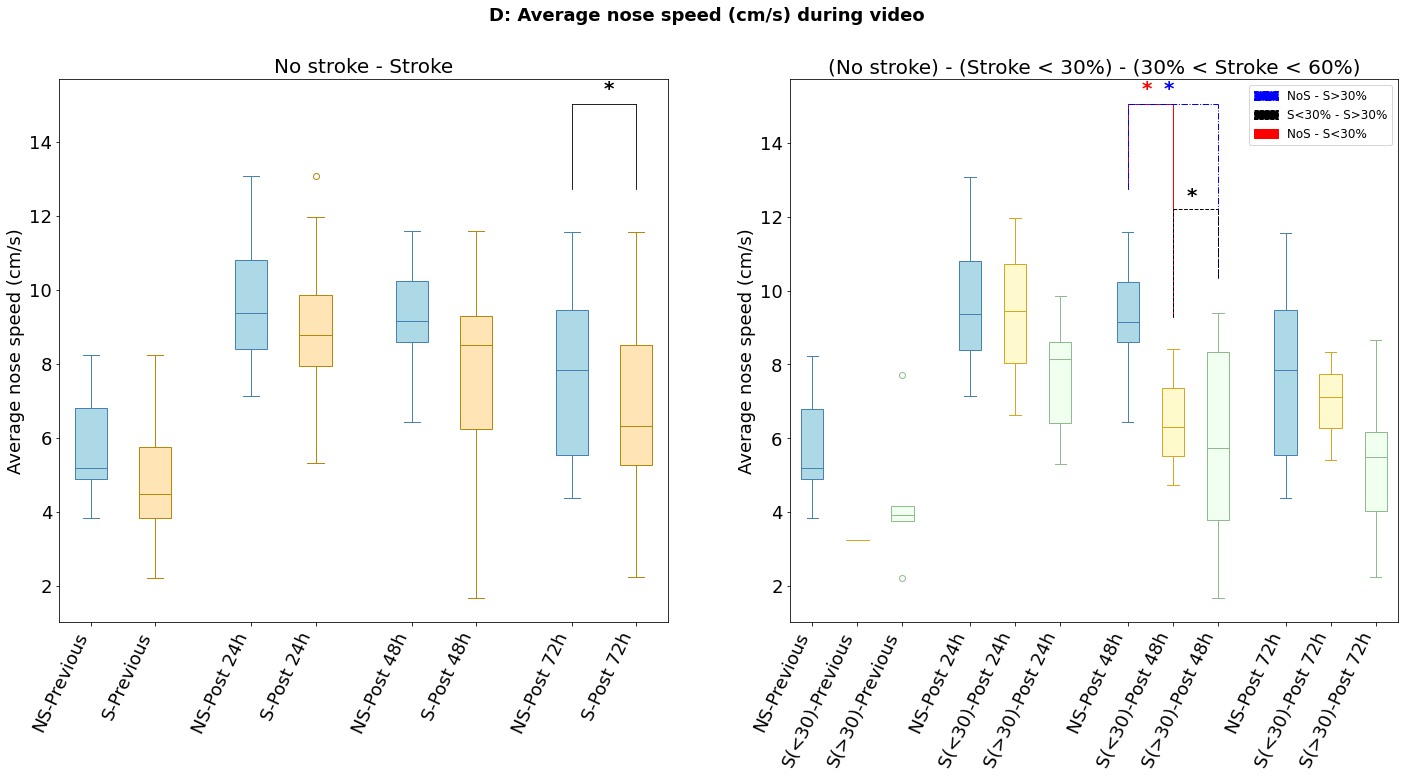

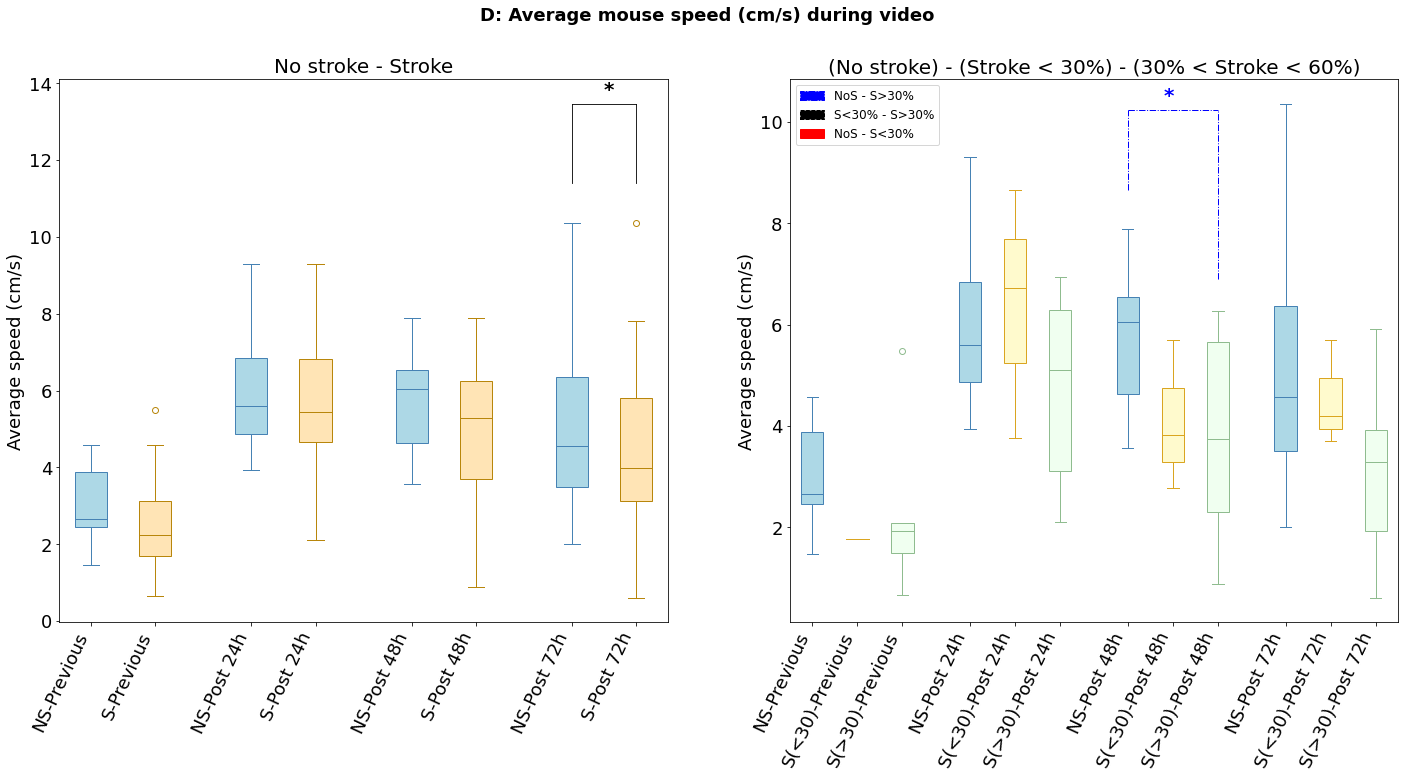

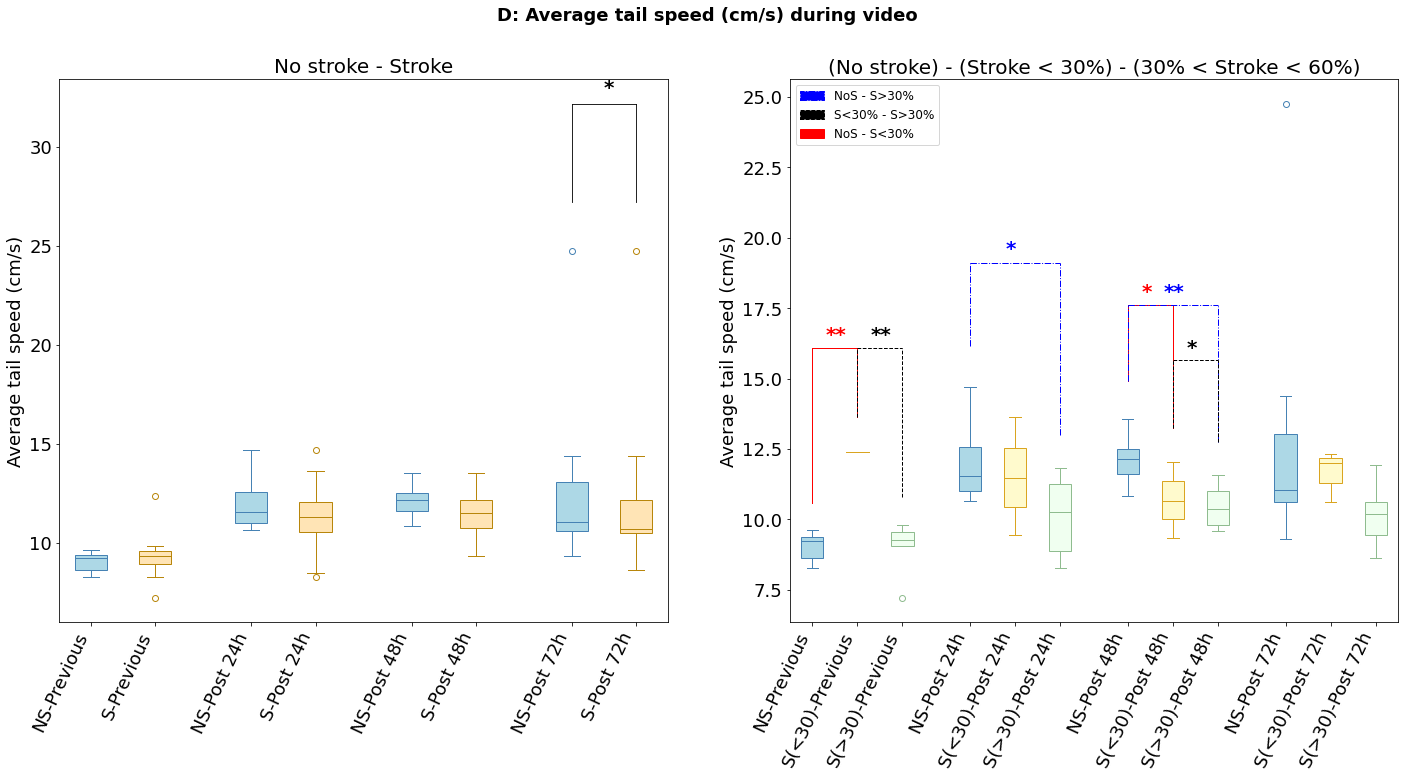

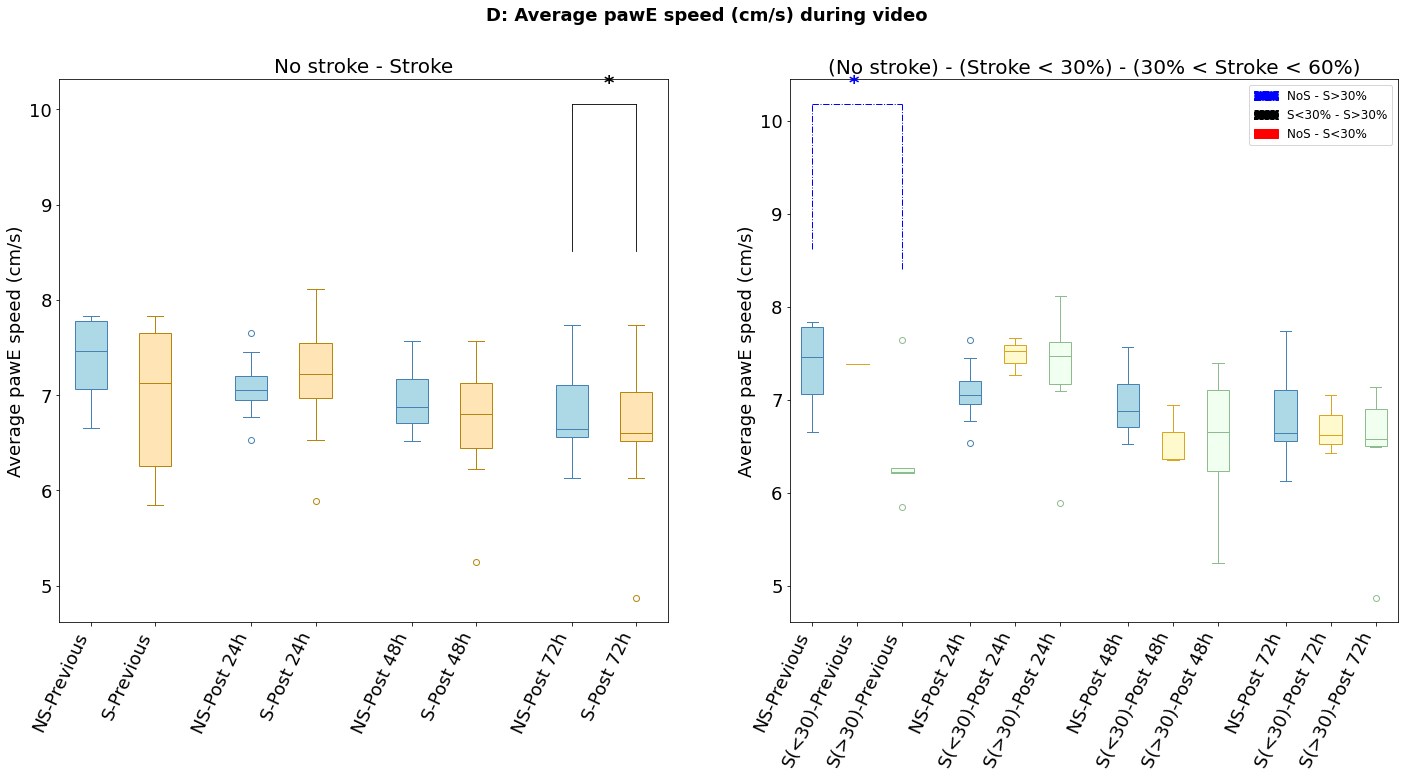

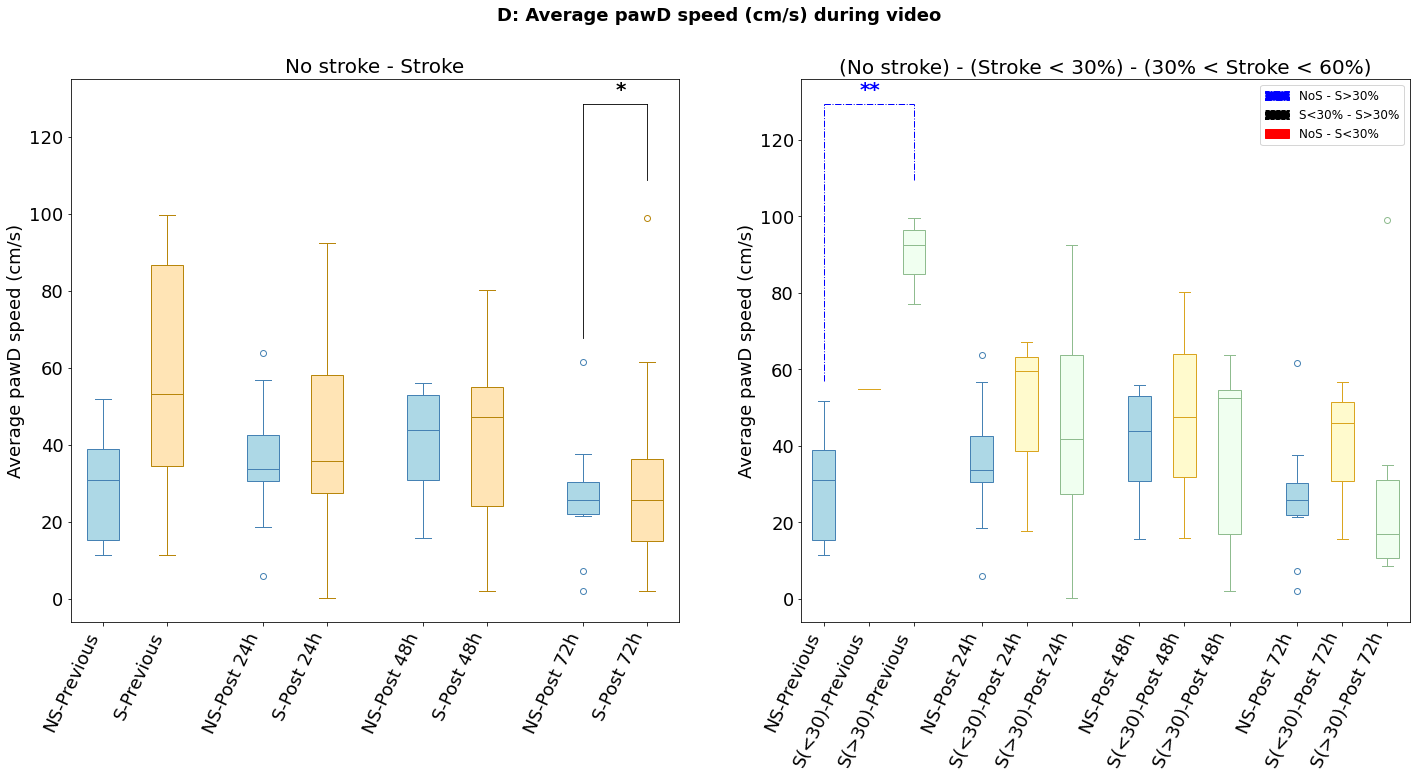

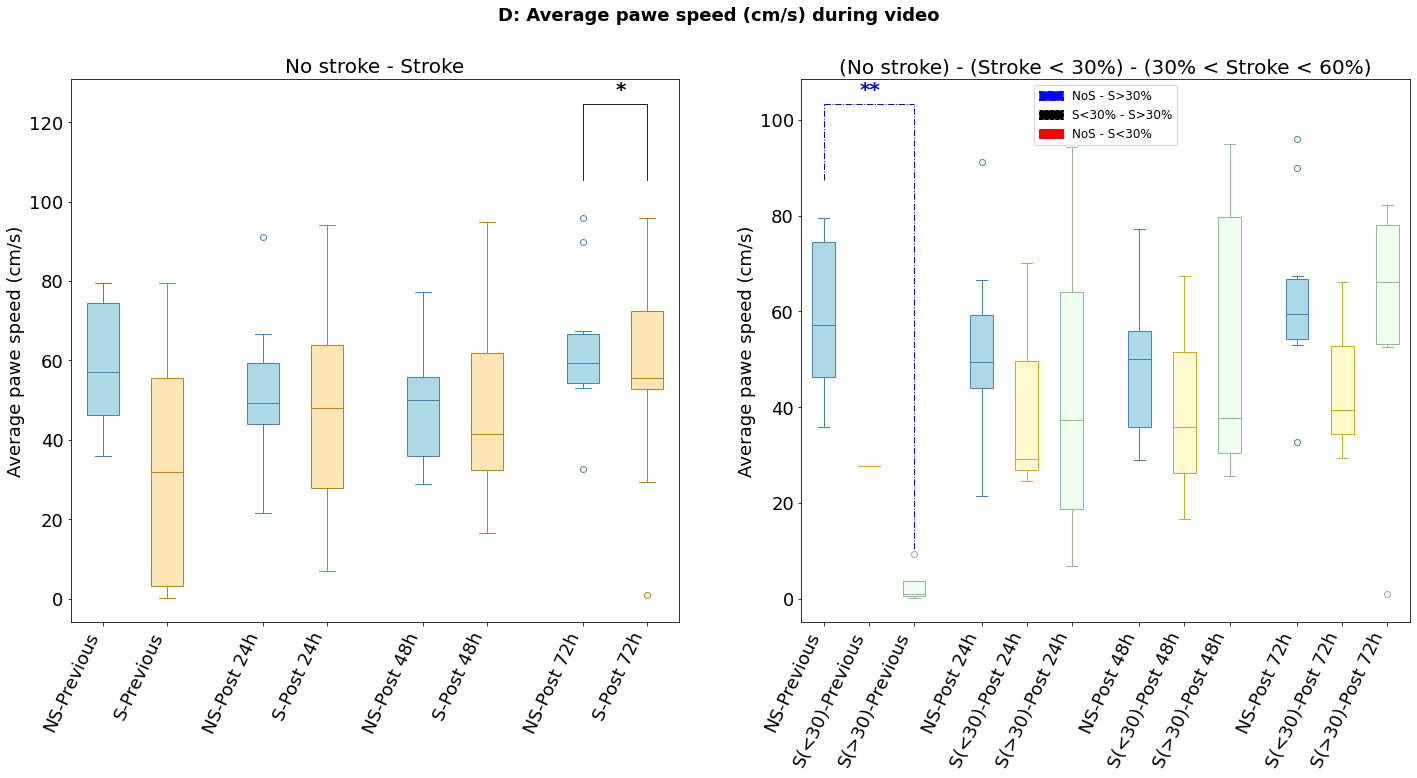

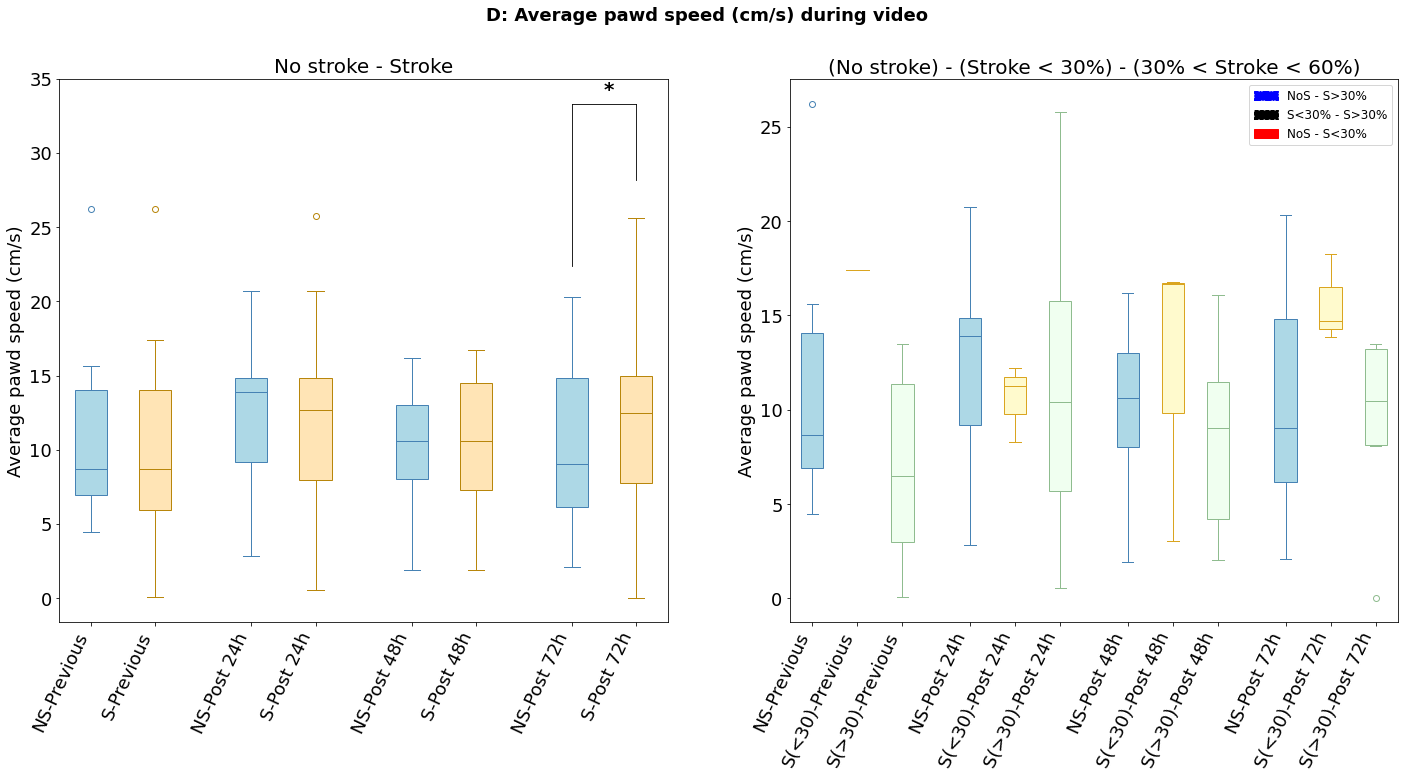

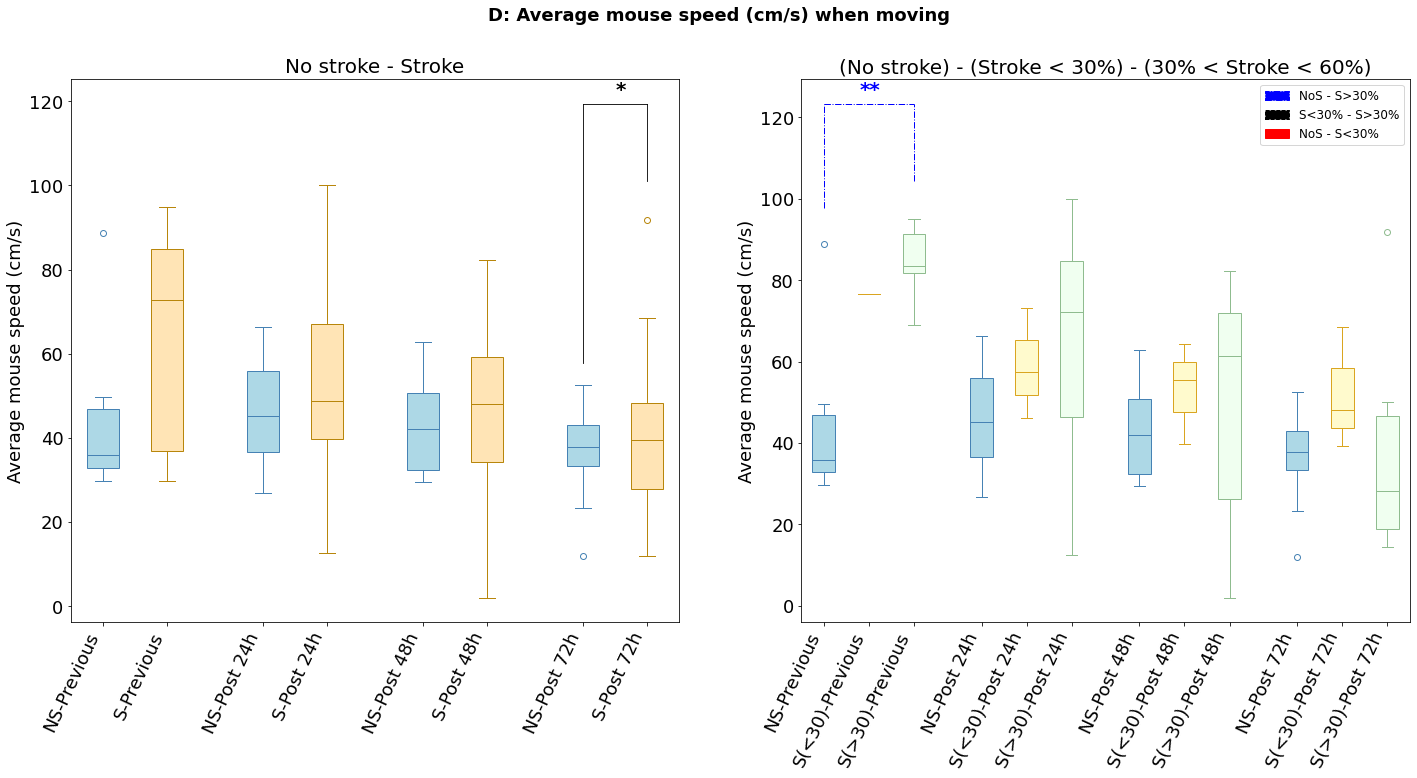

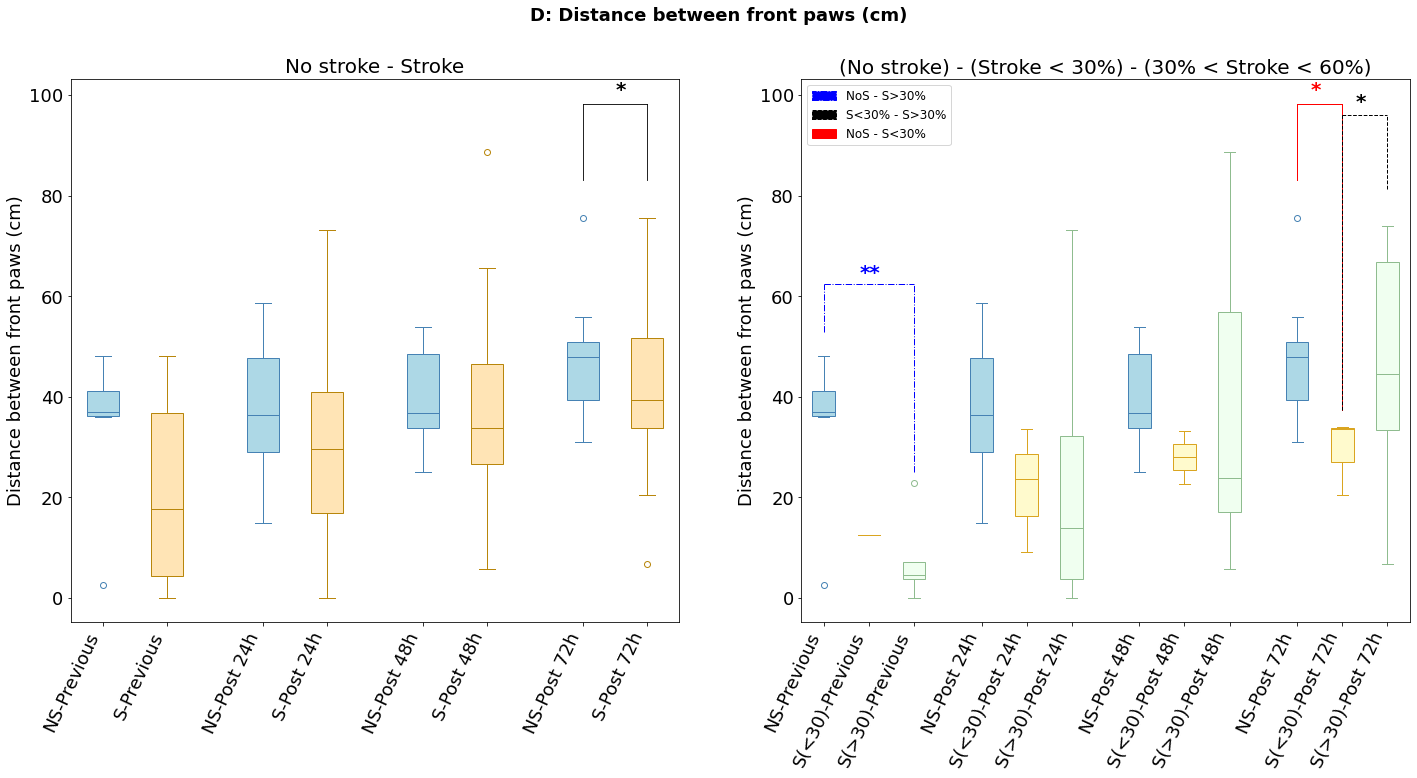

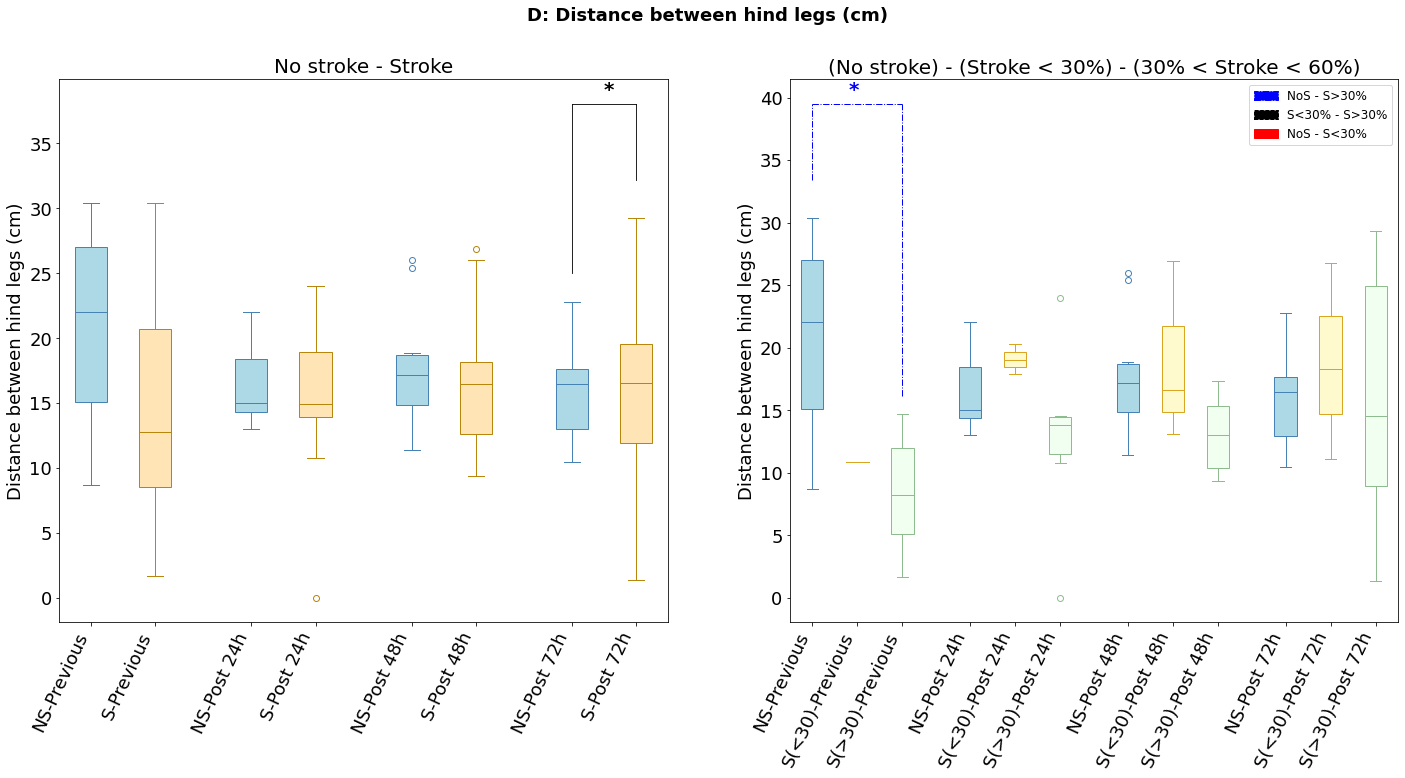

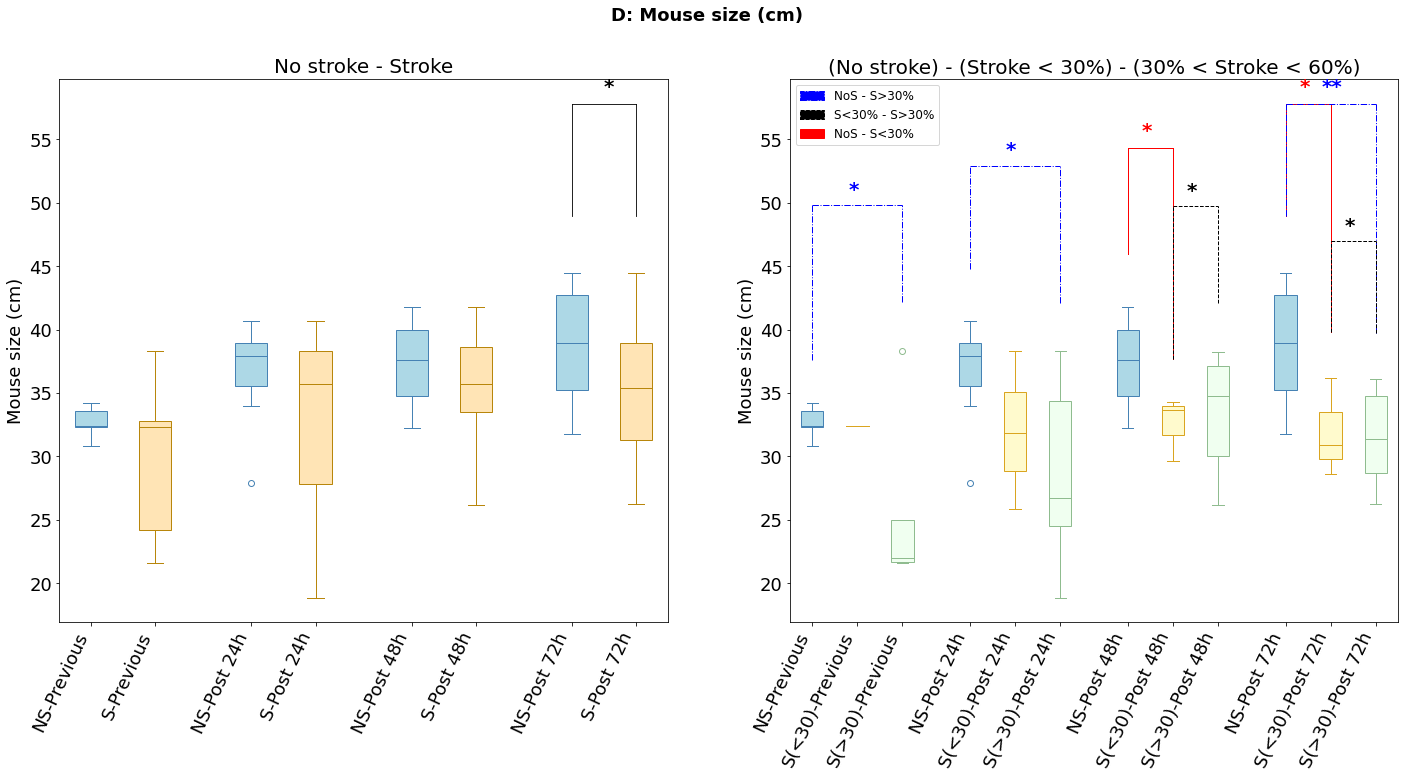

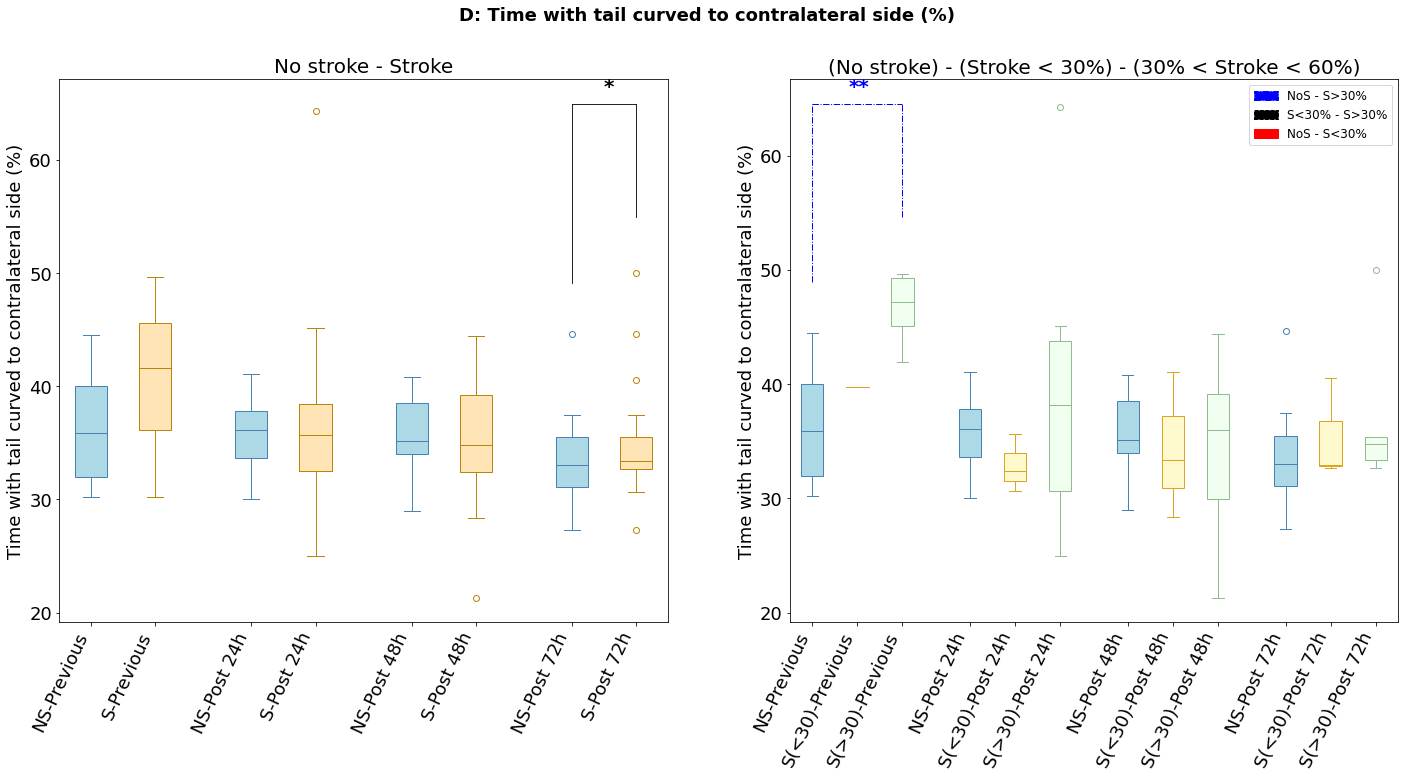

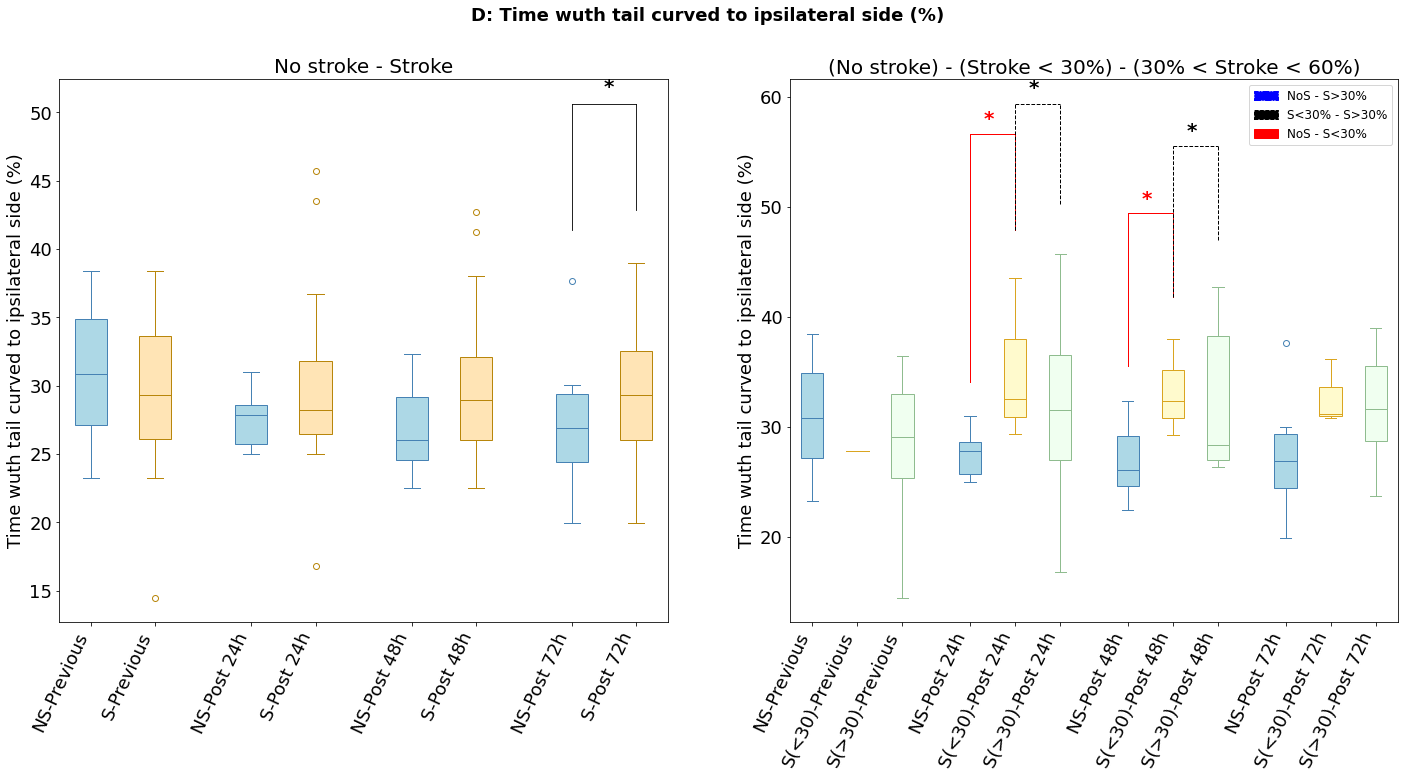

In [18]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
"""
COMBIO PROJECT: DATA ANALYSIS
Nuria Mercade & Marta Alcalde
"""

# Libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import scipy.stats       as stats
from sklearn  import preprocessing
import matplotlib.patches as mpatches

#file = "C:/Users/Marta/Dropbox/COMBIO/dades.xlsx"
file = "/Users/nmercade/Desktop/dades.xlsx"
data = pd.read_excel(file,\
                     header = 0, usecols = "A,B,H:AD")
# =============================================================================
# Exploration of % of infart
# =============================================================================
limits = np.array([1,30,100,0])

infart = pd.DataFrame([4.7,20.50,4.1,49.5,0,0,0,0,7,27.1,38,0,36.1,0,0,0,56.5,\
                       40.4,0,0,35,22.7,0,0,42.1])

ax = infart.plot.hist(grid = True, bins = 21, rwidth = 0.9, legend = False)
for rect in ax.patches:
    if rect.get_x() >= 0 and rect.get_x() <= limits[0]:
        rect.set_color('darkseagreen')
    if rect.get_x() > limits[0] and rect.get_x() <= limits[1]:
        rect.set_color('moccasin')
    if rect.get_x() > limits[1] and rect.get_x() <= limits[2]:
        rect.set_color('lightsteelblue')
plt.xlabel("% of infart", fontsize = 15); plt.ylabel("Counts", fontsize = 15); 
plt.tick_params(labelsize = 15)
#plt.savefig("Groups.png")


# =============================================================================
# TAPE REMOVAL ANALYSIS
# =============================================================================

param = list(data.head()); param = param[3:]
title = ["Distance (cm)", "Moving time (%)", \
         "Average nose speed (cm/s) during video", \
         "Average mouse speed (cm/s) during video", \
         "Average tail speed (cm/s) during video", \
         "Average pawE speed (cm/s) during video", \
         "Average pawD speed (cm/s) during video",\
         "Average pawe speed (cm/s) during video", \
         "Average pawd speed (cm/s) during video", \
         "Average mouse speed (cm/s) when moving", \
         "Distance between front paws (cm)", \
         "Distance between hind legs (cm)", \
         "Mouse size (cm)", \
         "Time with tail curved to contralateral side (%)", \
         "Time wuth tail curved to ipsilateral side (%)", \
         "Time with straight tail (%)", \
         "Time with body curved to contralateral side (%)",\
         "Time with body curved to ipsilateral side (%)", \
         "Time with the body straight (%)", \
         "Turns when moving to contralateral side (%)", \
         "Turns when moving to ipsilateral side (%)", \
         "Walking straight (%)" ]
title1 = ["Distance (cm)", "Moving time (%)", \
         "Average nose speed (cm/s)", \
         "Average speed (cm/s)", \
         "Average tail speed (cm/s)", \
         "Average pawE speed (cm/s)", \
         "Average pawD speed (cm/s)",\
         "Average pawe speed (cm/s)", \
         "Average pawd speed (cm/s)", \
         "Average mouse speed (cm/s)", \
         "Distance between front paws (cm)", \
         "Distance between hind legs (cm)", \
         "Mouse size (cm)", \
         "Time with tail curved to contralateral side (%)", \
         "Time wuth tail curved to ipsilateral side (%)", \
         "Time with straight tail (%)", \
         "Time with body curved to contralateral side (%)",\
         "Time with body curved to ipsilateral side (%)", \
         "Time with the body straight (%)", \
         "Turns when moving to contralateral side (%)", \
         "Turns when moving to ipsilateral side (%)", \
         "Walking straight (%)" ]



for k,i in enumerate(param):
    # POST 24H
    trpost24h = data.loc[data["Test"] == "TR - POST - 24H"]; 
    trpost24h_1 = trpost24h.loc[(trpost24h["% Infarct"] <= limits[0]) & (trpost24h["% Infarct"] >= 0)]
    trpost24h_1 = np.array(trpost24h_1[i].dropna())
    trpost24h_1 = trpost24h_1[trpost24h_1 <= (np.mean(trpost24h_1)*0.9 + np.mean(trpost24h_1)) ]

    trpost24h_2 = trpost24h.loc[(trpost24h["% Infarct"] <= limits[1]) & (trpost24h["% Infarct"] >= limits[0])]
    trpost24h_2 = np.array(trpost24h_2[i].dropna())
    trpost24h_2 = trpost24h_2[trpost24h_2 <= (np.mean(trpost24h_2)*0.9 + np.mean(trpost24h_2))]
    
    trpost24h_3 = trpost24h.loc[(trpost24h["% Infarct"] <= limits[2]) & (trpost24h["% Infarct"] >= limits[1])]
    trpost24h_3 = np.array(trpost24h_3[i].dropna())
    trpost24h_3 = trpost24h_3[trpost24h_3 <= (np.mean(trpost24h_3)*0.9 + np.mean(trpost24h_3)) ]
    
    trpost24h_4 = trpost24h.loc[(trpost24h["% Infarct"] >= limits[3])]
    trpost24h_4 = np.array(trpost24h_4[i].dropna())
    trpost24h_4 = trpost24h_4[trpost24h_4 <= (np.mean(trpost24h_4)*0.9 + np.mean(trpost24h_4))]
    
    # POST 48H
    trpost48h = data.loc[data["Test"] == "TR - POST - 48H"]; 
    trpost48h_1 = trpost48h.loc[(trpost48h["% Infarct"] <= limits[0]) & (trpost48h["% Infarct"] >= 0)]
    trpost48h_1 = np.array(trpost48h_1[i].dropna())
    trpost48h_1 = trpost48h_1[trpost48h_1 <= (np.mean(trpost48h_1)*0.9 + np.mean(trpost48h_1)) ]

    trpost48h_2 = trpost48h.loc[(trpost48h["% Infarct"] <= limits[1]) & (trpost48h["% Infarct"] >= limits[0])]
    trpost48h_2 = np.array(trpost48h_2[i].dropna())
    trpost48h_2 = trpost48h_2[trpost48h_2 <= (np.mean(trpost48h_2)*0.9 + np.mean(trpost48h_2))]
    
    trpost48h_3 = trpost48h.loc[(trpost48h["% Infarct"] <= limits[2]) & (trpost48h["% Infarct"] >= limits[1])]
    trpost48h_3 = np.array(trpost48h_3[i].dropna())
    trpost48h_3 = trpost48h_3[trpost48h_3 <= (np.mean(trpost48h_3)*0.9 + np.mean(trpost48h_3)) ]
    
    trpost48h_4 = trpost48h.loc[(trpost48h["% Infarct"] >= limits[3])]
    trpost48h_4 = np.array(trpost48h_4[i].dropna())
    trpost48h_4 = trpost48h_4[trpost48h_4 <= (np.mean(trpost48h_4)*0.9 + np.mean(trpost48h_4)) ]
    
    # POST 72H
    trpost72h = data.loc[data["Test"] == "TR - POST - 72H"]; 
    trpost72h_1 = trpost72h.loc[(trpost72h["% Infarct"] <= limits[0]) & (trpost72h["% Infarct"] >= 0)]
    trpost72h_1 = np.array(trpost72h_1[i].dropna())
    trpost72h_1 = trpost72h_1[trpost72h_1 <= (np.mean(trpost72h_1)*0.9 + np.mean(trpost72h_1)) ]

    trpost72h_2 = trpost72h.loc[(trpost72h["% Infarct"] <= limits[1]) & (trpost72h["% Infarct"] >= limits[0])]
    trpost72h_2 = np.array(trpost72h_2[i].dropna())
    trpost72h_2 = trpost72h_2[trpost72h_2 <= (np.mean(trpost72h_2)*0.9 + np.mean(trpost72h_2))]
    
    trpost72h_3 = trpost72h.loc[(trpost72h["% Infarct"] <= limits[2]) & (trpost72h["% Infarct"] >= limits[1])]
    trpost72h_3 = np.array(trpost72h_3[i].dropna())
    trpost72h_3 = trpost72h_3[trpost72h_3 <= (np.mean(trpost72h_3)*0.9 + np.mean(trpost72h_3)) ]
    
    trpost72h_4 = trpost72h.loc[trpost72h["% Infarct"] >= limits[3]]
    trpost72h_4 = np.array(trpost72h_4[i].dropna())
    trpost72h_4 = trpost72h_4[trpost72h_4 <= (np.mean(trpost72h_4)*0.9 + np.mean(trpost72h_4)) ]

    # PREVIOUS
    trpre = data.loc[data["Test"] == "TR - PRE"]; 
    trpre_1 = trpre.loc[(trpre["% Infarct"] <= limits[0]) & (trpre["% Infarct"] >= 0)]
    trpre_1 = np.array(trpre_1[i].dropna())
    trpre_1 = trpre_1[trpre_1 <= (np.mean(trpre_1)*0.9 + np.mean(trpre_1)) ]

    trpre_2 = trpre.loc[(trpre["% Infarct"] <= limits[1]) & (trpre["% Infarct"] >= limits[0])]
    trpre_2 = np.array(trpre_2[i].dropna())
    trpre_2 = trpre_2[trpre_2 <= (np.mean(trpre_2)*0.9 + np.mean(trpre_2))]
    
    trpre_3 = trpre.loc[(trpre["% Infarct"] <= limits[2]) & (trpre["% Infarct"] >= limits[1])]
    trpre_3 = np.array(trpre_3[i].dropna())
    trpre_3 = trpre_3[trpre_3 <= (np.mean(trpre_3)*0.9 + np.mean(trpre_3)) ]
    
    trpre_4 = trpre.loc[(trpre["% Infarct"] >= limits[3])]
    trpre_4 = np.array(trpre_4[i].dropna())
    trpre_4 = trpre_4[trpre_4 <= (np.mean(trpre_4)*0.9 + np.mean(trpre_4)) ]
    
    # ARRAYS FOR SUBPLOTS
    tr1 = [trpre_1,trpost24h_1,trpost48h_1,trpost72h_1]
    tr2 = [trpre_2,trpost24h_2,trpost48h_2,trpost72h_2]
    tr3 = [trpre_3,trpost24h_3,trpost48h_3,trpost72h_3]
    tr4 = [trpre_4,trpost24h_4,trpost48h_4,trpost72h_4]
    tr = {0: tr4, 1:tr2, 2: tr3} 
    tpre = [trpre_4, trpre_2, trpre_3]
    t24  = [trpost24h_4, trpost24h_2, trpost24h_3]
    t48  = [trpost48h_4, trpost48h_2, trpost48h_3]
    t72  = [trpost72h_4, trpost72h_2, trpost72h_3]
    plottitles = ['No stroke - Stroke', '(No stroke) - (Stroke < 30%) - (30% < Stroke < 60%)']
    
    # FIGURE
    fig  = plt.figure(figsize = (24,8))
    fig.suptitle('TR: {}'.format(title[k]), fontsize = 18, fontweight = 'bold')
    
    # SUBPLOT NO STROKE - STROKE
    plt.subplot(1,2,1)
    plt.title(plottitles[0],fontsize=20)
    box1 = plt.boxplot(tr1, labels = ('NS-Previous','NS-Post 24h','NS-Post 48h',\
                                'NS-Post 72h'), positions = [0,2.5,5,7.5],\
                   patch_artist = True)
    c1 = 'steelblue';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box1[item], color = c1)
        plt.setp(box1["boxes"], facecolor = "lightblue")
        plt.setp(box1["fliers"], markeredgecolor = c1)
    box2 = plt.boxplot(tr4, labels = ('S-Previous','S-Post 24h','S-Post 48h',\
                                'S-Post 72h'), positions = [1,3.5,6,8.5],\
                       patch_artist = True)
    c2 = 'darkgoldenrod';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box2[item], color = c2)
        plt.setp(box2["boxes"],  facecolor = "moccasin")
        plt.setp(box2["fliers"], markeredgecolor = c2)

    plt.tick_params(labelsize = 18)
    plt.ylabel(title1[k], fontsize = 18)
    plt.xticks(rotation=50, ha="right")

    factorstext={0: [0,1], 1:[2.5,3.5], 2:[5,6], 3:[7.5,8.5]}
    
    for j in range(4):
        fvalue, pvalue = stats.f_oneway(tr1[j],tr4[j])
        m1 = max(tr1[j]); m2 = max(tr4[j]); m = max(np.array([m1,m2])) # height of horizontal line
   
        if (pvalue < 0.05) and (pvalue > 0.01):
            plt.plot(factorstext[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical left
            plt.plot(factorstext[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical right
            plt.plot(np.linspace(factorstext[j][0],factorstext[j][1],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth = 0.85) # horizontal
            plt.text(factorstext[j][0]+0.5, m+0.32*m, '*',fontsize = 20, fontweight='bold')
            
        if pvalue < 0.01:
            plt.plot(factorstext[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical left
            plt.plot(factorstext[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical right
            plt.plot(np.linspace(factorstext[j][0],factorstext[j][1],5),np.ones(5)*(m+0.3*m),     color = 'black',linewidth = 0.85) # horizontal
            plt.text(factorstext[j][0]+0.5, m+0.32*m, '**', fontsize = 20, fontweight='bold')

    # SUBPLOT 'No stroke - Stroke < 30% - 30% < Stroke < 60%'
    plt.subplot(1,2,2)
    plt.title(plottitles[1],fontsize=20)
    box1 = plt.boxplot(tr1, labels = ('NS-Previous','NS-Post 24h','NS-Post 48h',\
                                'NS-Post 72h'), positions = [0,3.5,7,10.5],\
                   patch_artist = True)
    c1 = 'steelblue';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box1[item], color = c1)
        plt.setp(box1["boxes"], facecolor = "lightblue")
        plt.setp(box1["fliers"], markeredgecolor = c1)
    box2 = plt.boxplot(tr2, labels = ('S(<30)-Previous','S(<30)-Post 24h','S(<30)-Post 48h',\
                                'S(<30)-Post 72h'), positions = [1,4.5,8,11.5],\
                       patch_artist = True)
    c2 = 'goldenrod';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box2[item], color = c2)
        plt.setp(box2["boxes"],  facecolor = "lemonchiffon")
        plt.setp(box2["fliers"], markeredgecolor = c2)
        
    box3 = plt.boxplot(tr3, labels = ('S(>30)-Previous','S(>30)-Post 24h','S(>30)-Post 48h',\
                                'S(>30)-Post 72h'), positions = [2,5.5,9,12.5],\
                       patch_artist = True)
    c3 = 'darkseagreen';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box3[item], color = c3)
        plt.setp(box3["boxes"],  facecolor = "honeydew")
        plt.setp(box3["fliers"], markeredgecolor = c3)

    plt.tick_params(labelsize = 18)
    plt.ylabel(title1[k], fontsize = 18)
    plt.xticks(rotation=50, ha="right")
    lfactor={0:[0,1,2], 1:[3.5,4.5,5.5], 2:[7,8,9], 3:[10.5,11.5,12.5]}
        
    for j in range(4):
        fvalue1, pvalue1 = stats.f_oneway(tr1[j],tr2[j])
        m1 = max(tr1[j]); m2 = max(tr2[j]); m = max(np.array([m1,m2])) # height of horizontal line
        cc1 = 'red'
        if (pvalue1 < 0.05) and (pvalue1 > 0.01):
            plt.plot(lfactor[j][0]*np.ones(5), np.linspace(m1+0.1*m1,m+0.3*m,5), linewidth = 1, color = cc1) # vertical left
            plt.plot(lfactor[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5), linewidth = 1, color = cc1) # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][1],5),np.ones(5)*(m+0.3*m), linewidth = 1, color = cc1) # horizontal
            plt.text(lfactor[j][0]+0.3, m+0.32*m, '*',fontsize = 20, fontweight='bold', color = cc1)    
        if pvalue1 < 0.01:
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),linewidth = 1, color = cc1) # vertical left
            plt.plot(lfactor[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5), linewidth = 1, color = cc1) # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][1],5),np.ones(5)*(m+0.3*m), linewidth = 1, color = cc1) # horizontal
            plt.text(lfactor[j][0]+0.3, m+0.32*m, '**', fontsize = 20, fontweight='bold', color = cc1)
        
        fvalue2, pvalue2 = stats.f_oneway(tr1[j],tr3[j])
        m1 = max(tr1[j]); m2 = max(tr3[j]); m = max(np.array([m1,m2])) # height of horizontal line
        cc2 = 'blue'
        if (pvalue2 < 0.05) and (pvalue2 > 0.01):
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = cc2,linewidth = 1,linestyle = '-.') # horizontal
            plt.text(lfactor[j][0]+0.8, m+0.32*m, '*',fontsize = 20, fontweight='bold', color=cc2)     
        if pvalue2 < 0.01:
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = cc2,linewidth = 1, linestyle = '-.') # horizontal
            plt.text(lfactor[j][0]+0.8, m+0.32*m, '**',fontsize = 20, fontweight='bold', color=cc2)

        fvalue3, pvalue3 = stats.f_oneway(tr3[j],tr2[j])
        m1 = max(tr2[j]); m2 = max(tr3[j]); m = max(np.array([m1,m2])) # height of horizontal line
        if (pvalue1 < 0.05) and (pvalue1 > 0.01):
            plt.plot(lfactor[j][1]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical right
            plt.plot(np.linspace(lfactor[j][1],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth = 1, linestyle = 'dashed') # horizontal
            plt.text(lfactor[j][1]+0.3, m+0.32*m, '*',fontsize = 20, fontweight='bold')
        if pvalue1 < 0.01:
            plt.plot(lfactor[j][1]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical right
            plt.plot(np.linspace(lfactor[j][1],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth =1, linestyle = 'dashed') # horizontal
            plt.text(lfactor[j][1]+0.3, m+0.32*m, '**',fontsize = 20, fontweight='bold')
    
    red_patch = mpatches.Patch(color='red', label='NoS - S<30%')
    black_patch = mpatches.Patch(color='black', linestyle = 'dashed', label='S<30% - S>30%')
    blue_patch = mpatches.Patch(color='blue', label='NoS - S>30%', linestyle = '-.')
    plt.legend(handles=[blue_patch, black_patch, red_patch], fontsize=12,loc='best')
    path='./NewFormatBoxplot/TR{}'.format(k)
    plt.savefig(path)


# =============================================================================
#  DEAMBULATION ANALYSIS
# =============================================================================
paramd = np.concatenate((param[0:4],param[9],param[12:]),axis=None)
titled = np.concatenate((title[0:4],title[9],title[12:]),axis=None)

for k,i in enumerate(paramd):
    # POST 
    dpost   = data.loc[data["Test"] == "DEAMB - POST"]
    dpost_1 = dpost.loc[(dpost["% Infarct"] <= limits[0]) & (dpost["% Infarct"] >= 0)]
    dpost_1 = np.array(dpost_1[i].dropna())

    dpost_2 = dpost.loc[(dpost["% Infarct"] <= limits[1]) & (dpost["% Infarct"] >= limits[0])]
    dpost_2 = np.array(dpost_2[i].dropna())
    
    dpost_3 = dpost.loc[(dpost["% Infarct"] <= limits[2]) & (dpost["% Infarct"] >= limits[1])]
    dpost_3 = np.array(dpost_3[i].dropna())
    
    dpost_4 = dpost.loc[(dpost["% Infarct"] >= limits[3])]
    dpost_4 = np.array(dpost_4[i].dropna())
    
    
    # 24H
    d24   = data.loc[data["Test"] == "DEAMB - 24H"]; 
    d24_1 = d24.loc[(d24["% Infarct"] <= limits[0]) & (d24["% Infarct"] >= 0)]
    d24_1 = np.array(d24_1[i].dropna())
    
    d24_2 = d24.loc[(d24["% Infarct"] <= limits[1]) & (d24["% Infarct"] >= limits[0])]
    d24_2 = np.array(d24_2[i].dropna())
    
    d24_3 = d24.loc[(d24["% Infarct"] <= limits[2]) & (d24["% Infarct"] >= limits[1])]
    d24_3 = np.array(d24_3[i].dropna())

    d24_4 = d24.loc[(d24["% Infarct"] >= limits[3])]
    d24_4 = np.array(d24_4[i].dropna())

    
    # 48H
    d48   = data.loc[data["Test"] == "DEAMB - 48H"]; 
    d48_1 = d48.loc[(d48["% Infarct"] <= limits[0]) & (d48["% Infarct"] >= 0)]
    d48_1 = np.array(d48_1[i].dropna())
    
    d48_2 = d48.loc[(d48["% Infarct"] <= limits[1]) & (d48["% Infarct"] >= limits[0])]
    d48_2 = np.array(d48_2[i].dropna())
    
    d48_3 = d48.loc[(d48["% Infarct"] <= limits[2]) & (d48["% Infarct"] >= limits[1])]
    d48_3 = np.array(d48_3[i].dropna())

    d48_4 = d48.loc[(d48["% Infarct"] >= limits[3])]
    d48_4 = np.array(d48_4[i].dropna())
    
    # 72 H
    d72   = data.loc[data["Test"] == "DEAMB - 72H"]; 
    d72_1 = d72.loc[(d72["% Infarct"] <= limits[0]) & (d72["% Infarct"] >= 0)]
    d72_1 = np.array(d72_1[i].dropna())
    
    d72_2 = d72.loc[(d72["% Infarct"] <= limits[1]) & (d72["% Infarct"] >= limits[0])]
    d72_2 = np.array(d72_2[i].dropna())
    
    d72_3 = d72.loc[(d72["% Infarct"] <= limits[2]) & (d72["% Infarct"] >= limits[1])]
    d72_3 = np.array(d72_3[i].dropna())

    d72_4 = d72.loc[(d72["% Infarct"] >= limits[3])]
    d72_4 = np.array(d72_4[i].dropna())
    
    # ARRAYS FOR SUBPLOTS
    d1 = [dpost_1, d24_1, d48_1, d72_1]  # No stroke
    d2 = [dpost_2, d24_2, d48_2, d72_2]  # 1-30% stroke
    d3 = [dpost_3, d24_3, d48_3, d72_3]  # >30% stroke
    d4 = [dpost_4, d24_4, d48_4, d72_4]  # Stroke
    deamb = {0: d4, 1: d2, 2: d3} 
    dposth = [dpost_4, dpost_2, dpost_3]
    d24h   = [d24_4, d24_2, d24_3]
    d48h   = [d48_4, d48_2, d48_3]
    d72h   = [d72_4, d72_2, d72_3]
    plottitles = ['No stroke - Stroke', '(No stroke) - (Stroke < 30%) - (30% < Stroke < 60%)']
    
    # FIGURE
    fig  = plt.figure(figsize = (24,10))
    fig.suptitle('D: {}'.format(title[k]), fontsize = 18, fontweight = 'bold')
    
    # SUBPLOT NO STROKE - STROKE
    plt.subplot(1,2,1)
    plt.title(plottitles[0],fontsize=20)
    box1 = plt.boxplot(d1, labels = ('NS-Previous','NS-Post 24h','NS-Post 48h',\
                                'NS-Post 72h'), positions = [0,2.5,5,7.5],\
                   patch_artist = True)
    c1 = 'steelblue';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box1[item], color = c1)
        plt.setp(box1["boxes"], facecolor = "lightblue")
        plt.setp(box1["fliers"], markeredgecolor = c1)
    box2 = plt.boxplot(d4, labels = ('S-Previous','S-Post 24h','S-Post 48h',\
                                'S-Post 72h'), positions = [1,3.5,6,8.5],\
                       patch_artist = True)
    c2 = 'darkgoldenrod';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box2[item], color = c2)
        plt.setp(box2["boxes"],  facecolor = "moccasin")
        plt.setp(box2["fliers"], markeredgecolor = c2)

    plt.tick_params(labelsize = 18)
    plt.ylabel(title1[k], fontsize = 18)
    plt.xticks(rotation=65, ha="right")

    factorstext={0: [0,1], 1:[2.5,3.5], 2:[5,6], 3:[7.5,8.5]}
    
    for j in range(4):
        fvalue, pvalue = stats.f_oneway(tr1[j],tr4[j])
        m1 = max(d1[j]); m2 = max(d4[j]); m = max(np.array([m1,m2])) # height of horizontal line
   
        if (pvalue < 0.05) and (pvalue > 0.01):
            plt.plot(factorstext[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical left
            plt.plot(factorstext[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical right
            plt.plot(np.linspace(factorstext[j][0],factorstext[j][1],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth = 0.85) # horizontal
            plt.text(factorstext[j][0]+0.5, m+0.32*m, '*',fontsize = 20, fontweight='bold')
            
        if pvalue < 0.01:
            plt.plot(factorstext[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical left
            plt.plot(factorstext[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 0.85) # vertical right
            plt.plot(np.linspace(factorstext[j][0],factorstext[j][1],5),np.ones(5)*(m+0.3*m),     color = 'black',linewidth = 0.85) # horizontal
            plt.text(factorstext[j][0]+0.5, m+0.32*m, '**', fontsize = 20, fontweight='bold')

    # SUBPLOT 'No stroke - Stroke < 30% - 30% < Stroke < 60%'
    plt.subplot(1,2,2)
    plt.title(plottitles[1],fontsize=20)
    box1 = plt.boxplot(d1, labels = ('NS-Previous','NS-Post 24h','NS-Post 48h',\
                                'NS-Post 72h'), positions = [0,3.5,7,10.5],\
                   patch_artist = True)
    c1 = 'steelblue';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box1[item], color = c1)
        plt.setp(box1["boxes"], facecolor = "lightblue")
        plt.setp(box1["fliers"], markeredgecolor = c1)
    box2 = plt.boxplot(d2, labels = ('S(<30)-Previous','S(<30)-Post 24h','S(<30)-Post 48h',\
                                'S(<30)-Post 72h'), positions = [1,4.5,8,11.5],\
                       patch_artist = True)
    c2 = 'goldenrod';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box2[item], color = c2)
        plt.setp(box2["boxes"],  facecolor = "lemonchiffon")
        plt.setp(box2["fliers"], markeredgecolor = c2)
        
    box3 = plt.boxplot(d3, labels = ('S(>30)-Previous','S(>30)-Post 24h','S(>30)-Post 48h',\
                                'S(>30)-Post 72h'), positions = [2,5.5,9,12.5],\
                       patch_artist = True)
    c3 = 'darkseagreen';
    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box3[item], color = c3)
        plt.setp(box3["boxes"],  facecolor = "honeydew")
        plt.setp(box3["fliers"], markeredgecolor = c3)

    plt.tick_params(labelsize = 18)
    plt.ylabel(title1[k], fontsize = 18)
    plt.xticks(rotation=65, ha="right")
    lfactor={0:[0,1,2], 1:[3.5,4.5,5.5], 2:[7,8,9], 3:[10.5,11.5,12.5]}
        
    for j in range(4):
        fvalue1, pvalue1 = stats.f_oneway(d1[j],d2[j])
        m1 = max(d1[j]); m2 = max(d2[j]); m = max(np.array([m1,m2])) # height of horizontal line
        cc1 = 'red'
        if (pvalue1 < 0.05) and (pvalue1 > 0.01):
            plt.plot(lfactor[j][0]*np.ones(5), np.linspace(m1+0.1*m1,m+0.3*m,5), linewidth = 1, color = cc1) # vertical left
            plt.plot(lfactor[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5), linewidth = 1, color = cc1) # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][1],5),np.ones(5)*(m+0.3*m), linewidth = 1, color = cc1) # horizontal
            plt.text(lfactor[j][0]+0.3, m+0.32*m, '*',fontsize = 20, fontweight='bold', color = cc1)    
        if pvalue1 < 0.01:
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),linewidth = 1, color = cc1) # vertical left
            plt.plot(lfactor[j][1]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5), linewidth = 1, color = cc1) # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][1],5),np.ones(5)*(m+0.3*m), linewidth = 1, color = cc1) # horizontal
            plt.text(lfactor[j][0]+0.3, m+0.32*m, '**', fontsize = 20, fontweight='bold', color = cc1)
        
        fvalue2, pvalue2 = stats.f_oneway(d1[j],d3[j])
        m1 = max(d1[j]); m2 = max(d3[j]); m = max(np.array([m1,m2])) # height of horizontal line
        cc2 = 'blue'
        if (pvalue2 < 0.05) and (pvalue2 > 0.01):
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = cc2,linewidth = 1,linestyle = '-.') # horizontal
            plt.text(lfactor[j][0]+0.8, m+0.32*m, '*',fontsize = 20, fontweight='bold', color=cc2)     
        if pvalue2 < 0.01:
            plt.plot(lfactor[j][0]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = cc2,linewidth = 1, linestyle = '-.') # vertical right
            plt.plot(np.linspace(lfactor[j][0],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = cc2,linewidth = 1, linestyle = '-.') # horizontal
            plt.text(lfactor[j][0]+0.8, m+0.32*m, '**',fontsize = 20, fontweight='bold', color=cc2)

        fvalue3, pvalue3 = stats.f_oneway(d3[j],d2[j])
        m1 = max(d2[j]); m2 = max(d3[j]); m = max(np.array([m1,m2])) # height of horizontal line
        if (pvalue1 < 0.05) and (pvalue1 > 0.01):
            plt.plot(lfactor[j][1]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical right
            plt.plot(np.linspace(lfactor[j][1],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth = 1, linestyle = 'dashed') # horizontal
            plt.text(lfactor[j][1]+0.3, m+0.32*m, '*',fontsize = 20, fontweight='bold')
        if pvalue1 < 0.01:
            plt.plot(lfactor[j][1]*np.ones(5),np.linspace(m1+0.1*m1,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical left
            plt.plot(lfactor[j][2]*np.ones(5), np.linspace(m2+0.1*m2,m+0.3*m,5),color = 'black',linewidth = 1, linestyle = 'dashed') # vertical right
            plt.plot(np.linspace(lfactor[j][1],lfactor[j][2],5),np.ones(5)*(m+0.3*m), color = 'black',linewidth =1, linestyle = 'dashed') # horizontal
            plt.text(lfactor[j][1]+0.3, m+0.32*m, '**',fontsize = 20, fontweight='bold')
    
    red_patch = mpatches.Patch(color='red', label='NoS - S<30%')
    black_patch = mpatches.Patch(color='black', linestyle = 'dashed', label='S<30% - S>30%')
    blue_patch = mpatches.Patch(color='blue', label='NoS - S>30%', linestyle = '-.')
    plt.legend(handles=[blue_patch, black_patch, red_patch], fontsize=12,loc='best')
    path='./NewFormatBoxplot/D{}'.format(k)
    plt.savefig(path)

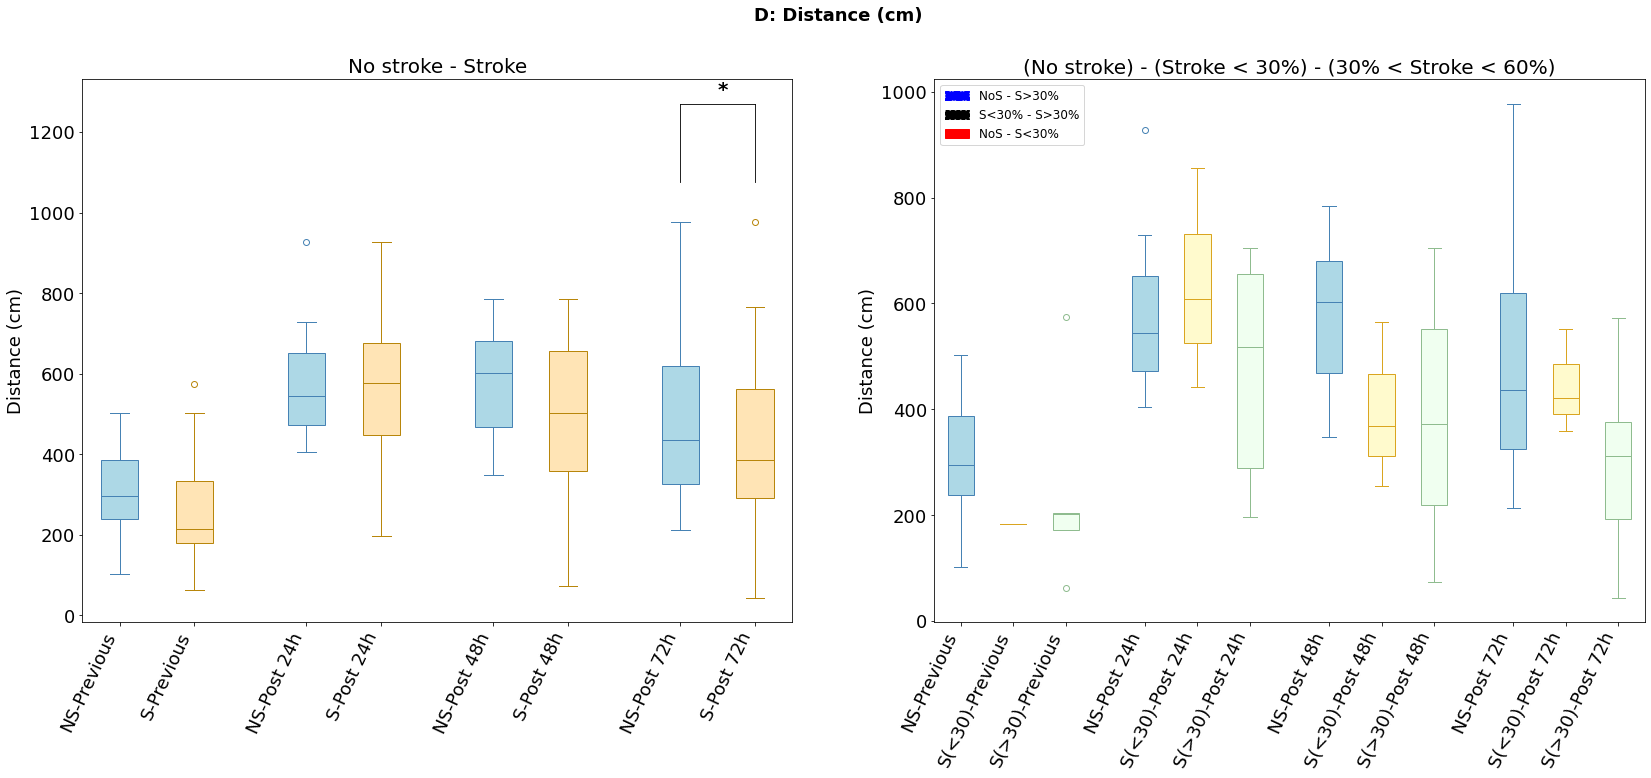

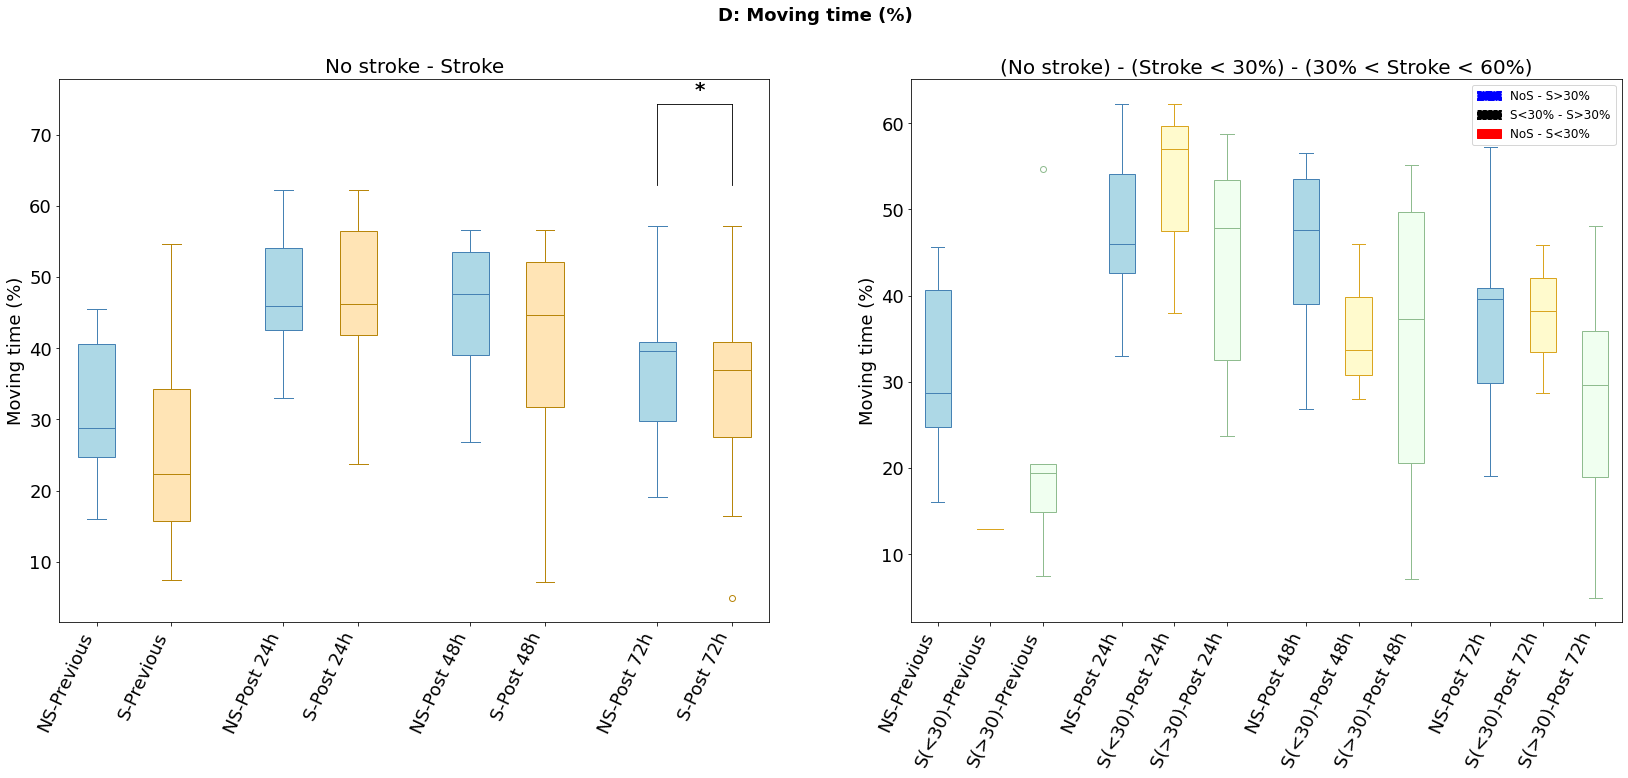

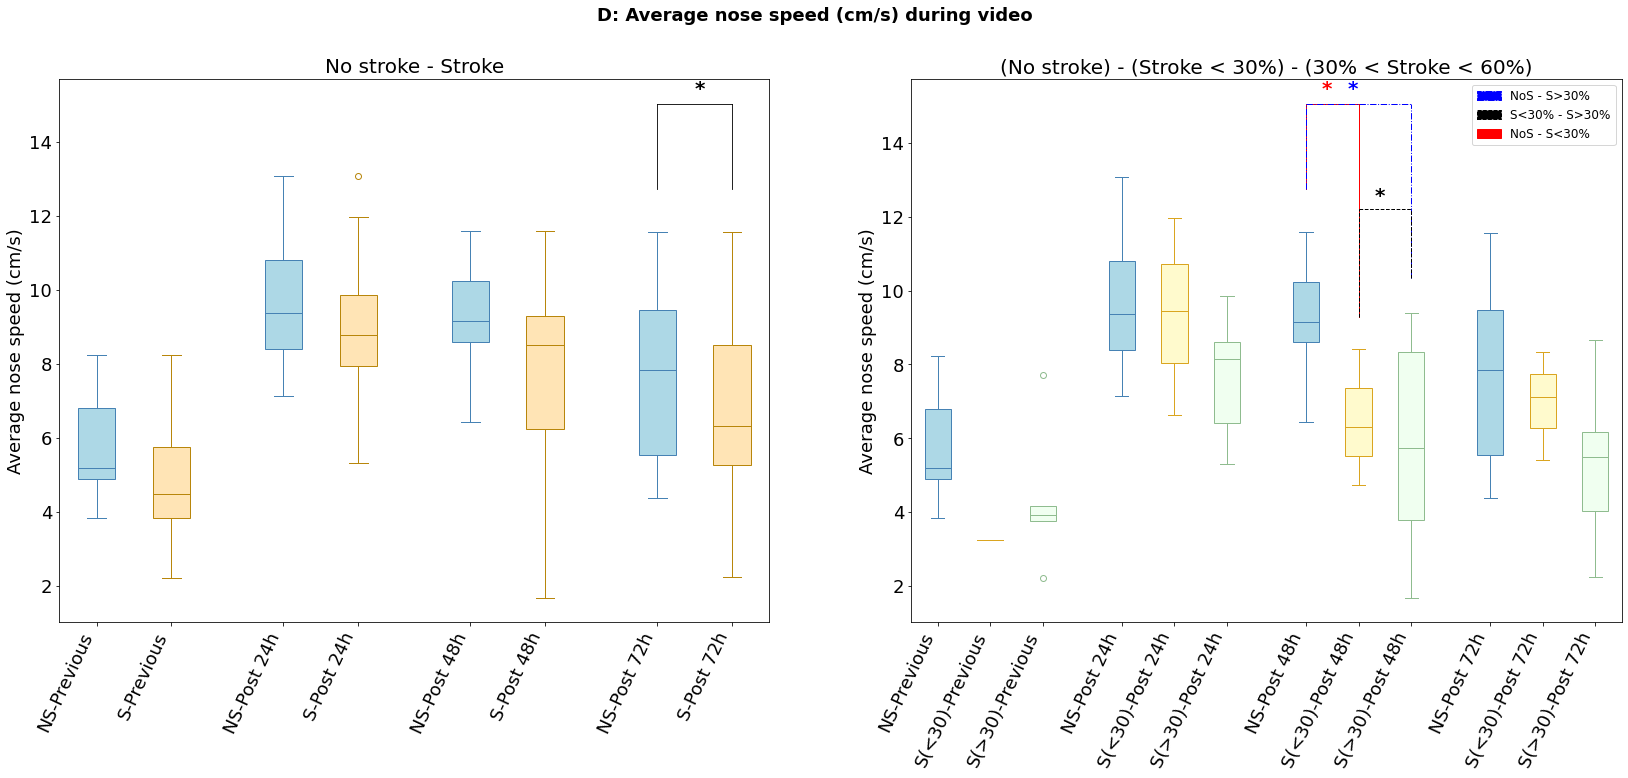

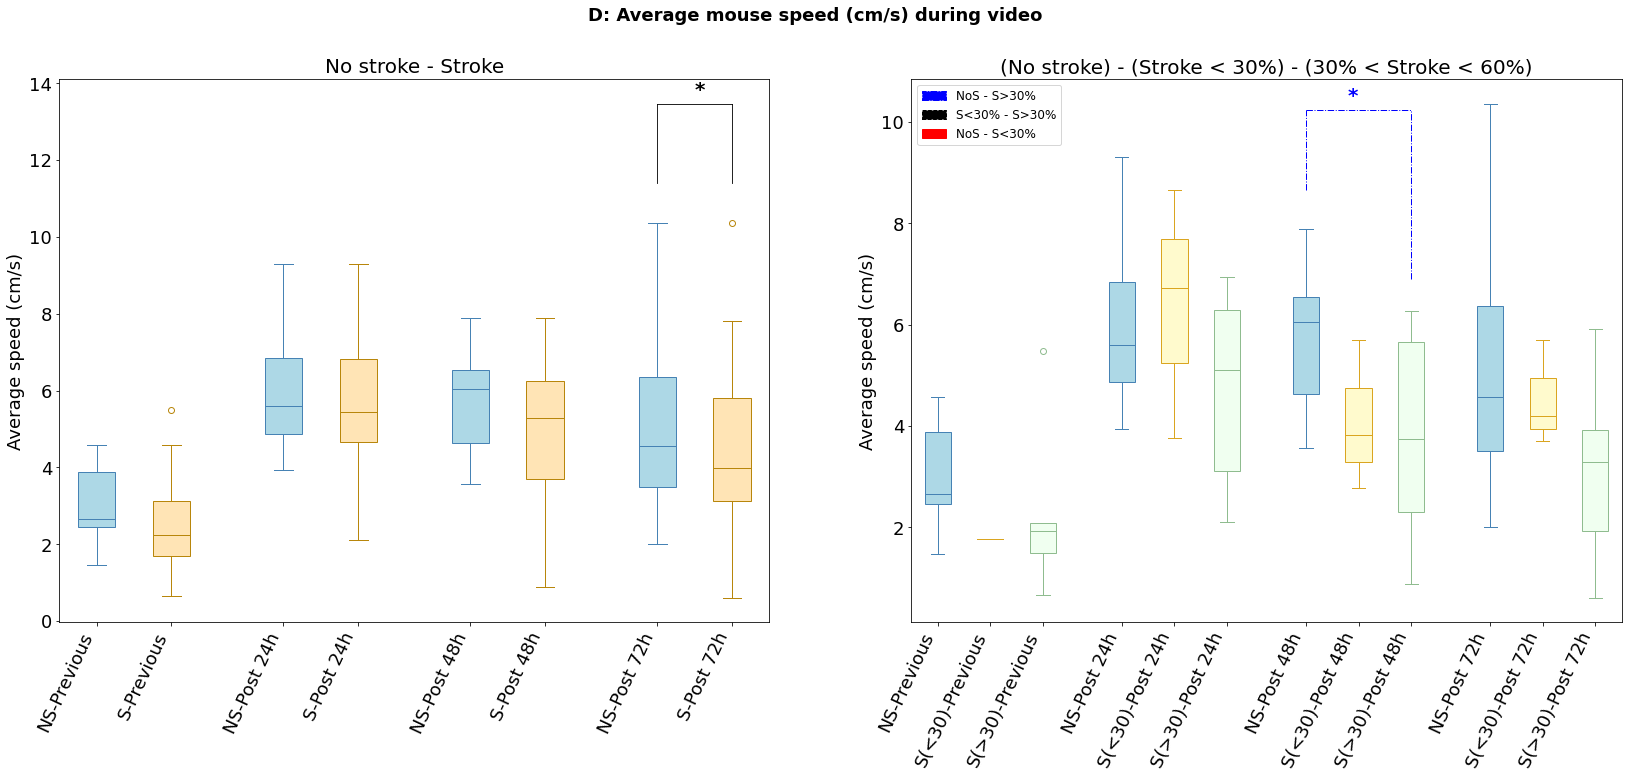

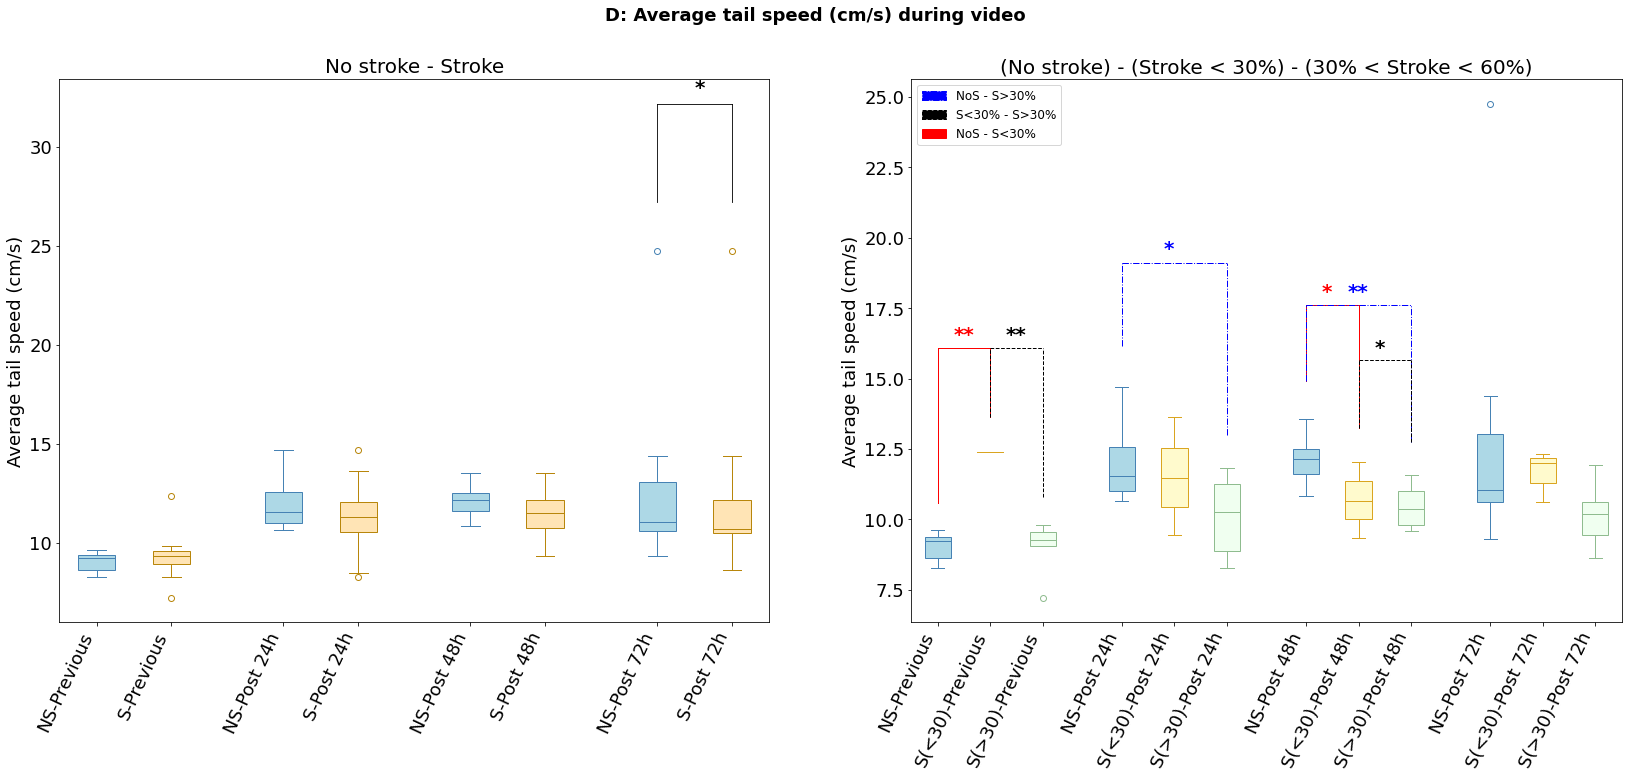

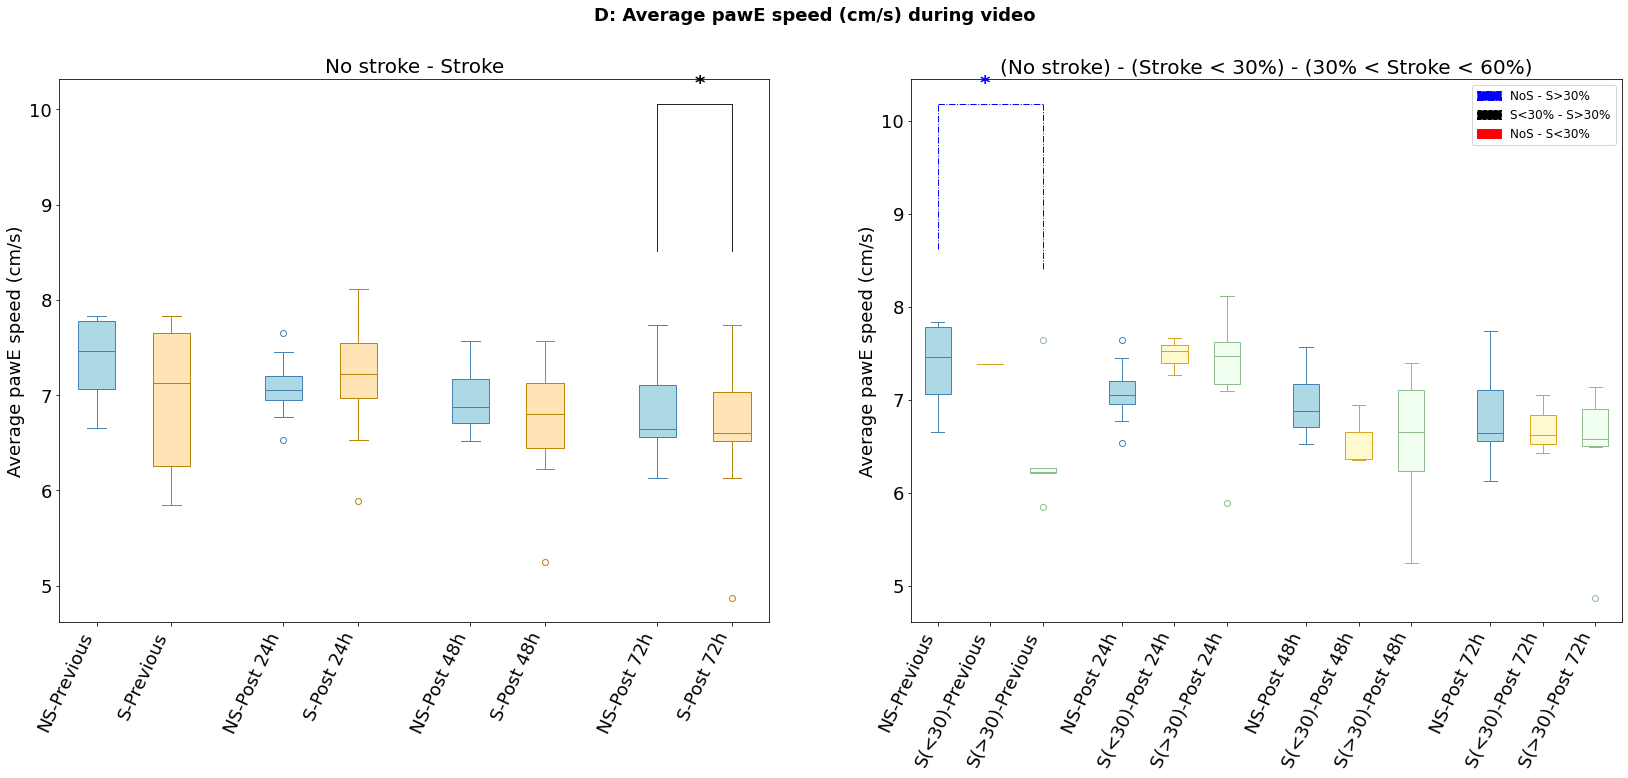

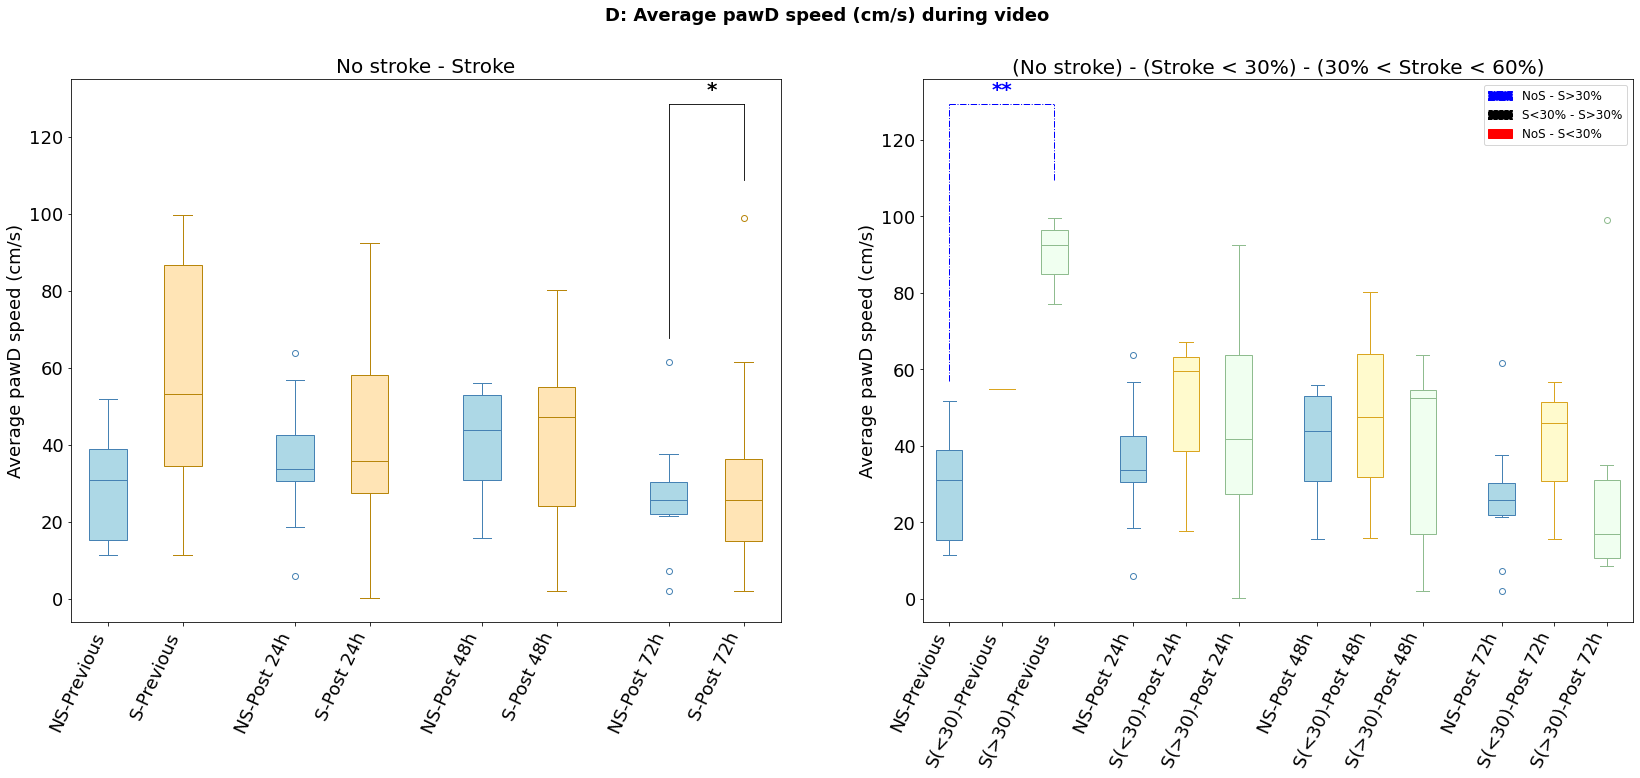

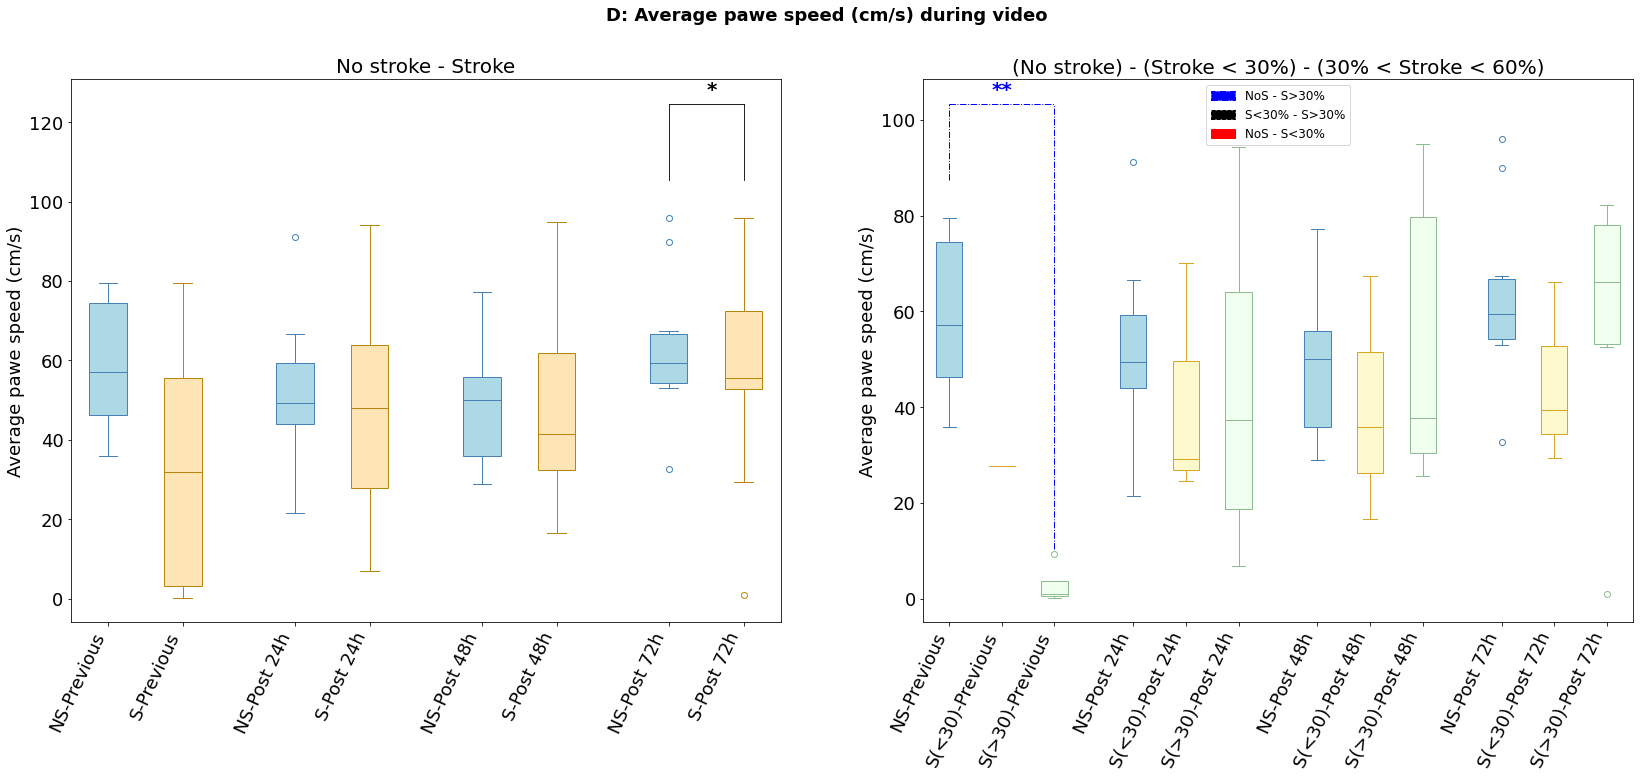

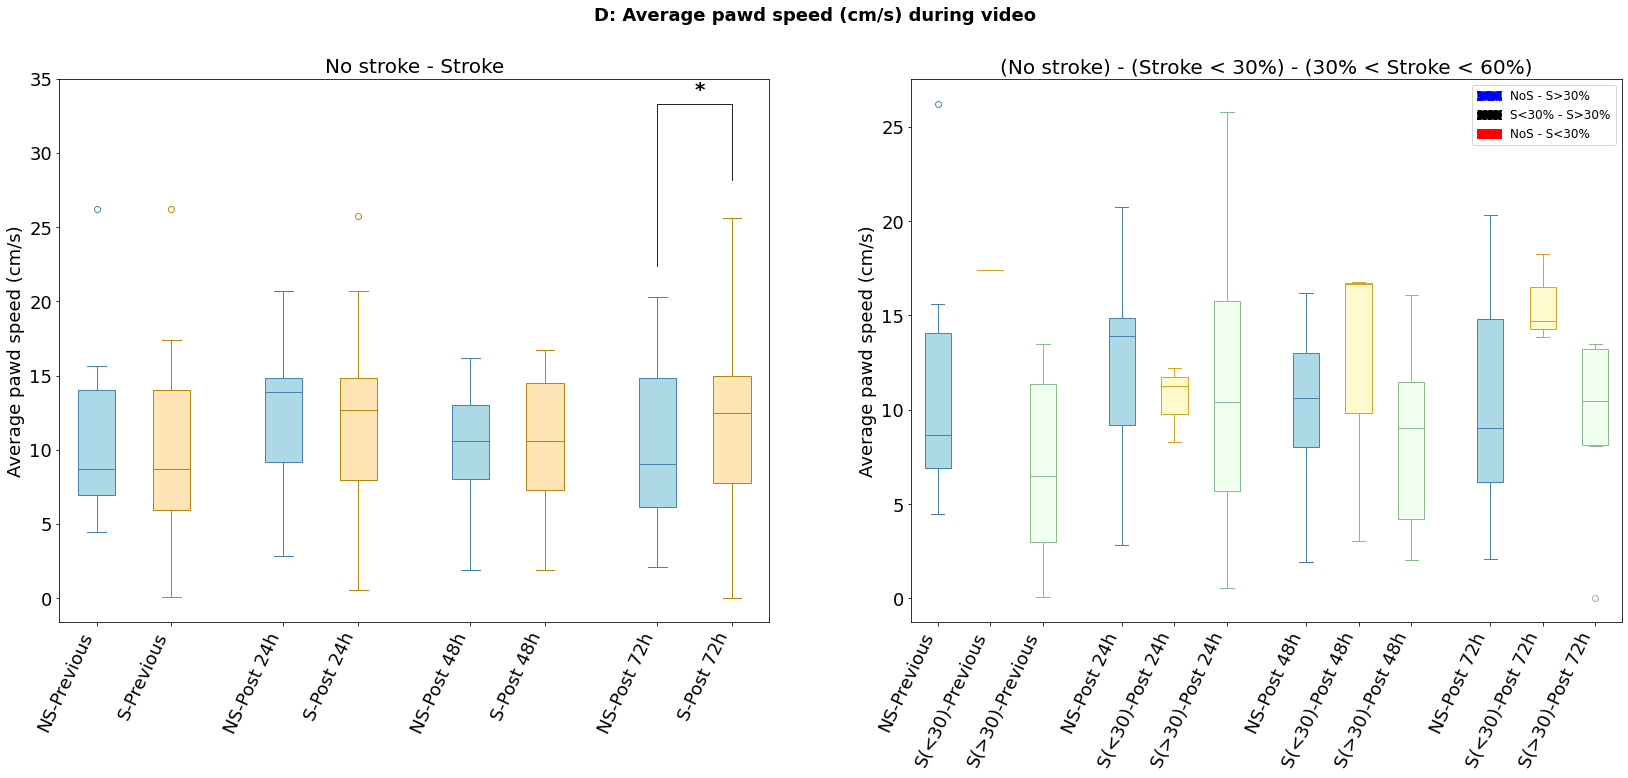

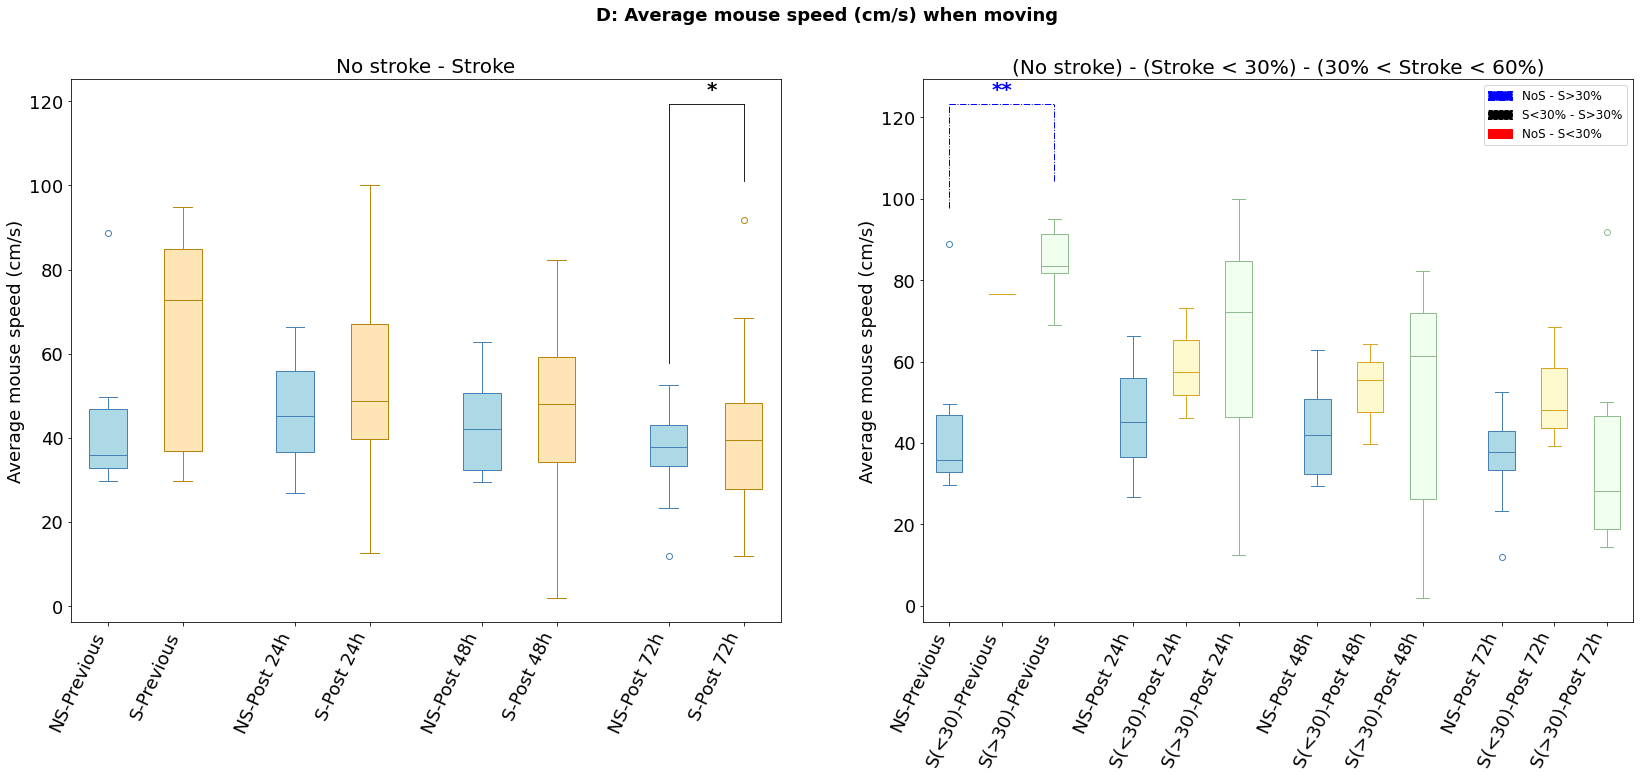

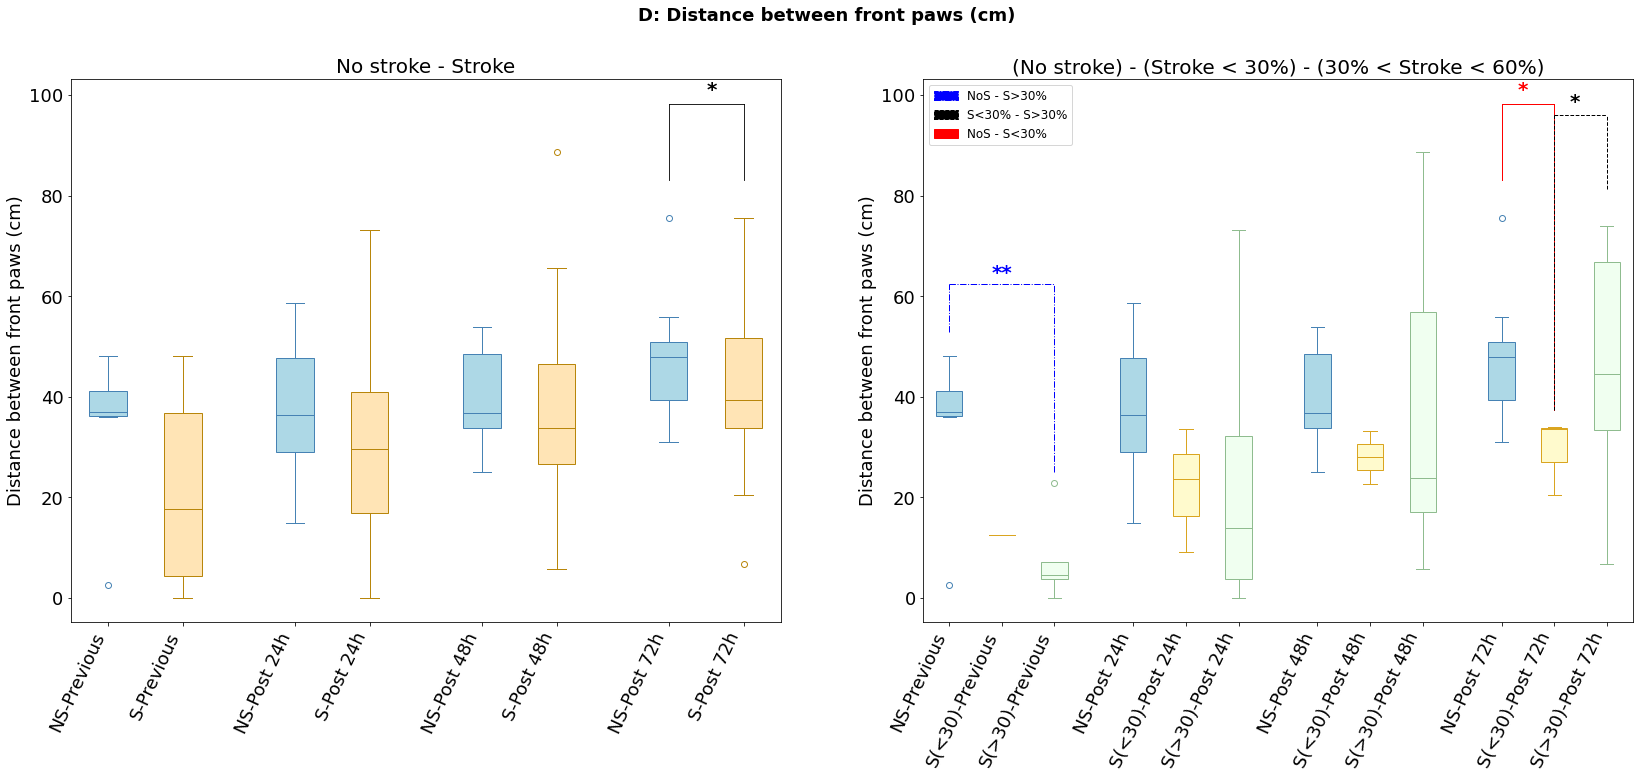

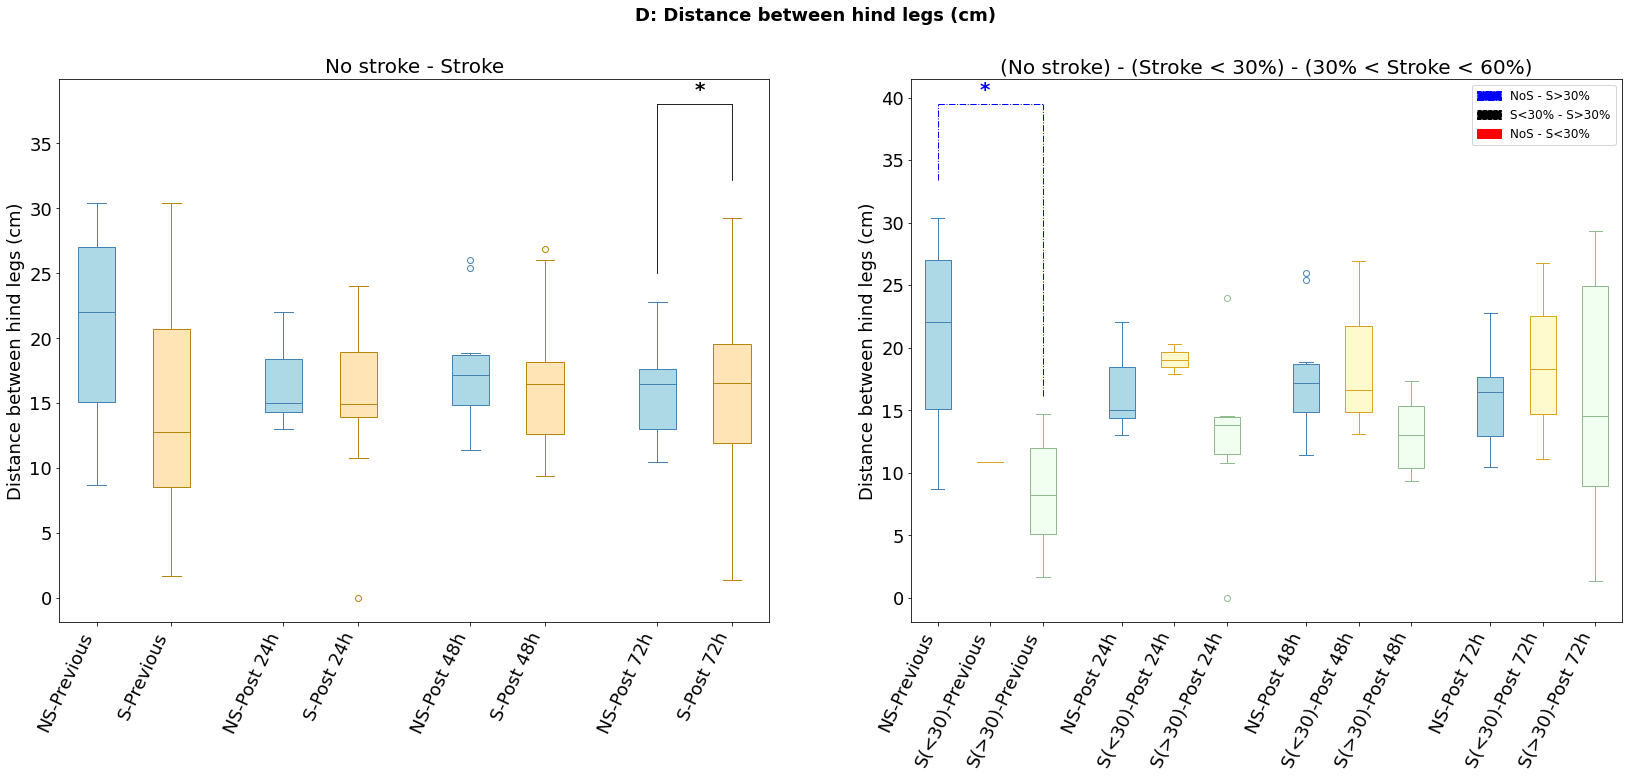

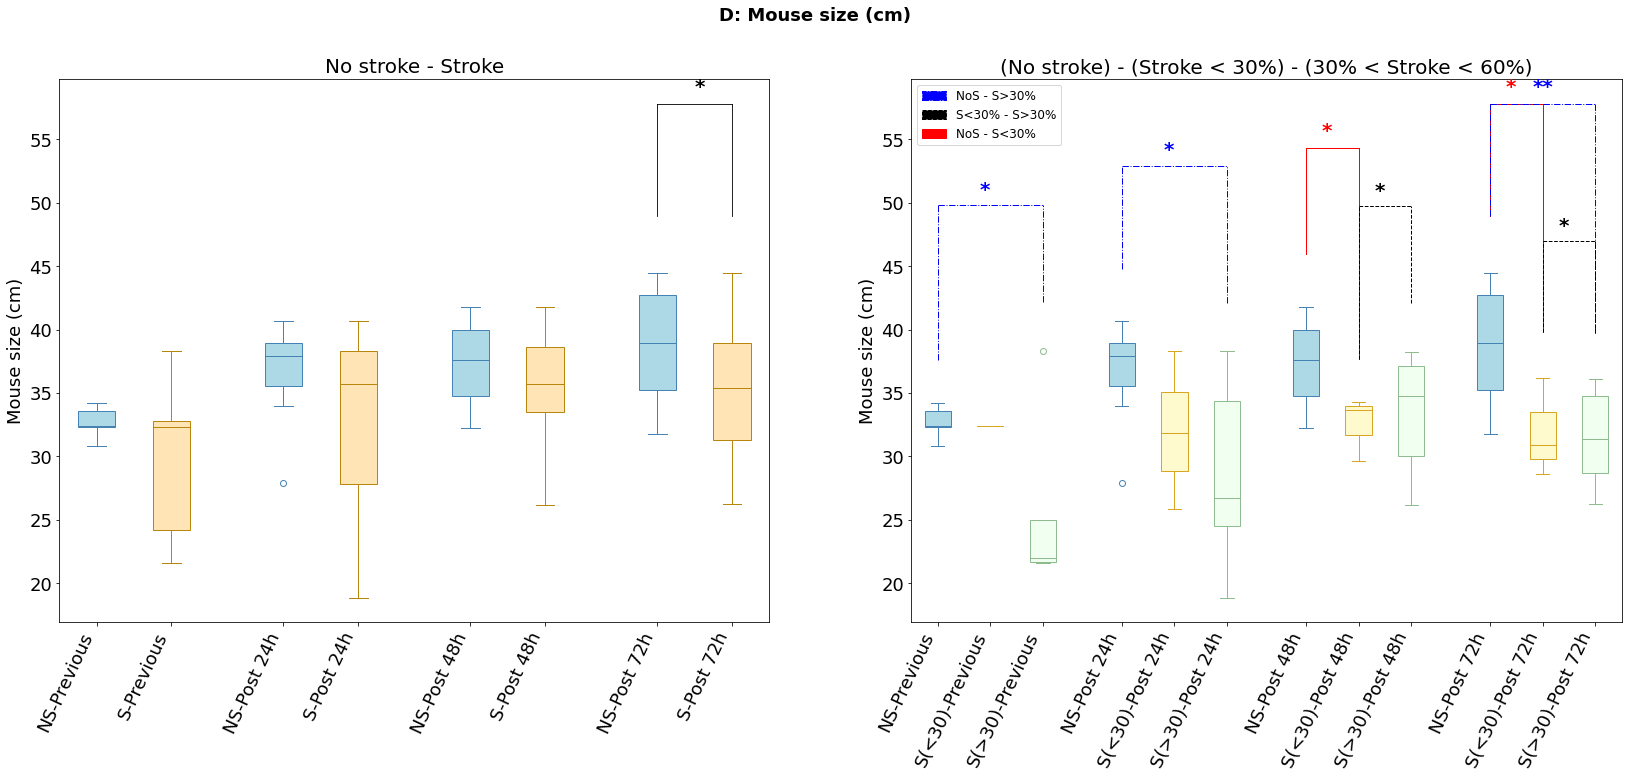

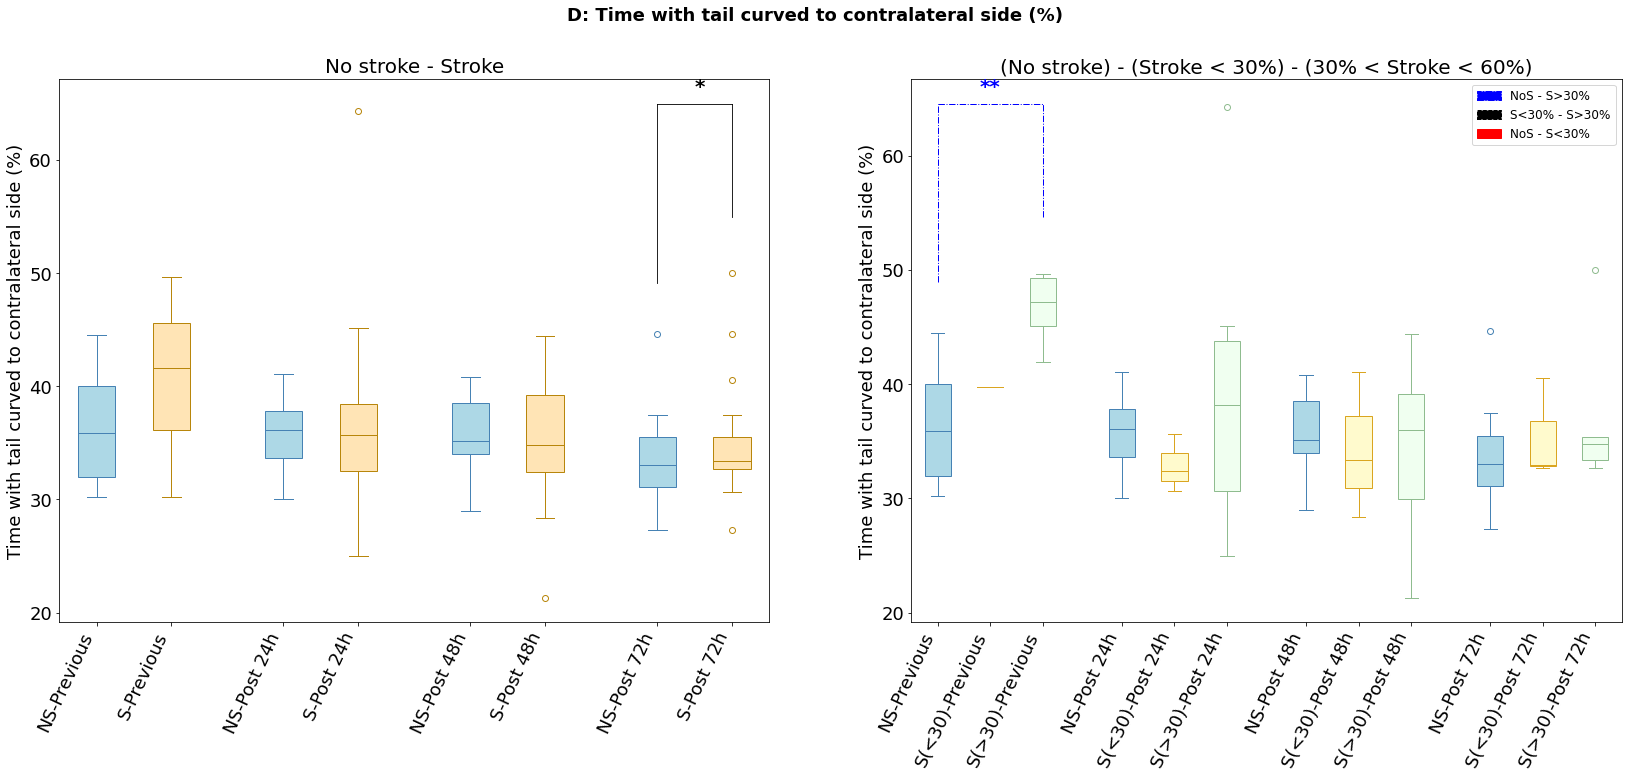

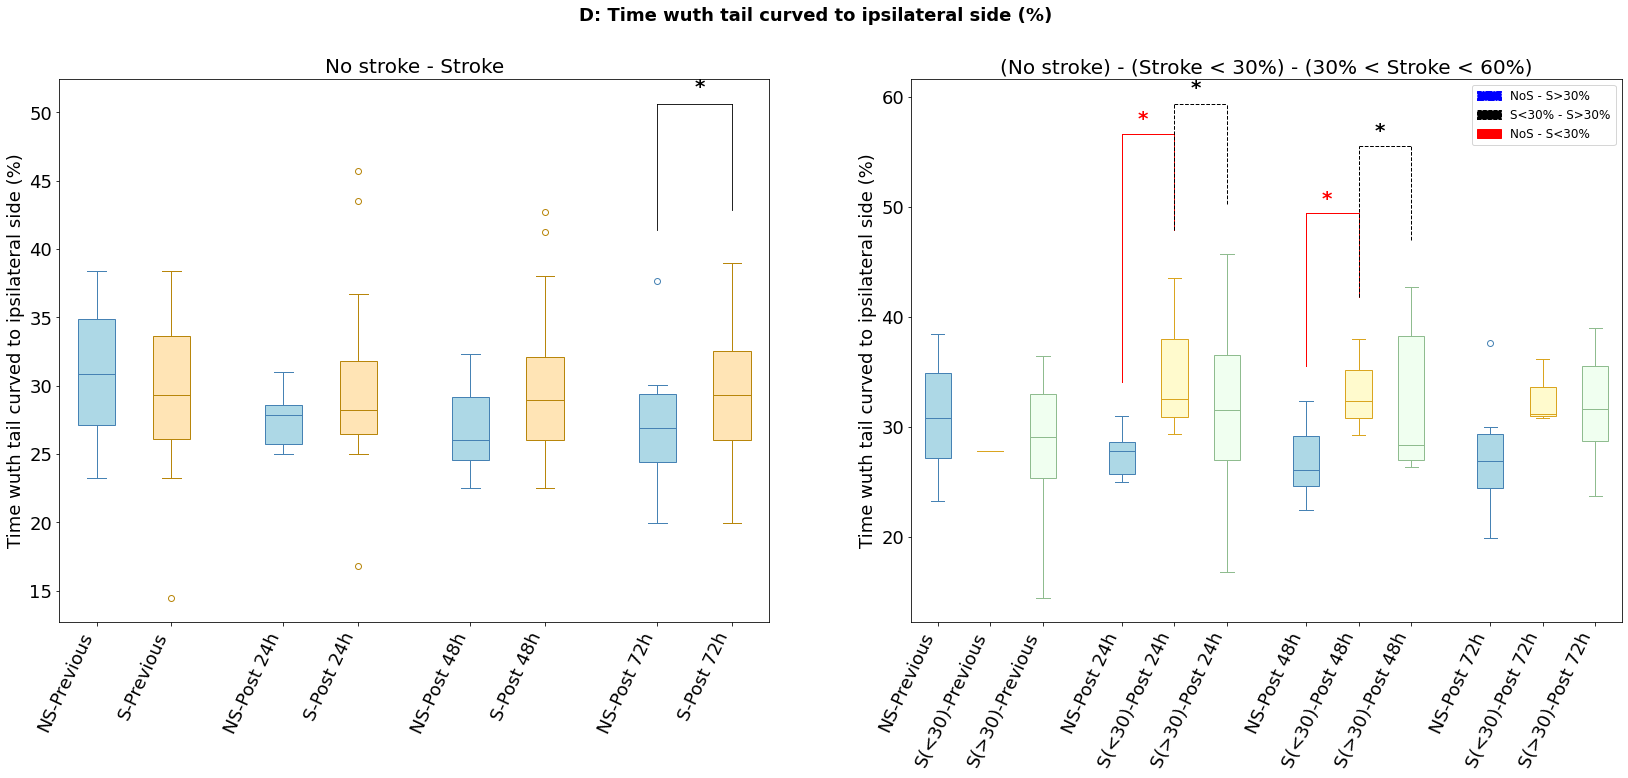

1
